
<h2>Etapa da metodologia CRISP-DM: Data Understanding, Data Preparation</h2>
<h3>Trabalho Final</h3>    

<hr style="height:2px"> 


## Descrição

Dado a correlação entre dois conjuntos de dados, Perfil do Candidato 2022 e Motivo Cassação2022, dentro do escopo dos estados do Sudeste do Brasil,pretendemos calculara porcentagem de candidatos com conduta antiética cujos mandatos foram cassados. Além disso, buscamos descobrir quais partidos possuem a maior quantidade de candidatos cassados e analisar se isso implica em sua popularidade. Por fim, traçar padrões nos perfis dos candidatos cassados, como nível de instrução, ocupação e cargo disputado para entender se há correlações entre seus perfis e as razões para a perdado mandato.

---
## Preparação dos dados

In [202]:
# -*- coding: utf-8 -*-

import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados

# bibliotecas usadas para geracao de graficos
import seaborn as sns
import matplotlib.pyplot as plt
import os
import codecs

Em seguida, os dados serão carregados do arquivo para um DataFrame pandas.

In [203]:
df_total = pd.read_csv('dataset/consulta_cand_2022/consulta_cand_2022_BRASIL.csv', sep=';', encoding='iso-8859-1')

# Candidatos
df_ES = pd.read_csv('dados_limpos/cassacao_cand_ES.csv', sep=',', encoding='iso-8859-1')
df_MG = pd.read_csv('dados_limpos/cassacao_cand_MG.csv', sep=',', encoding='iso-8859-1')
df_RJ = pd.read_csv('dados_limpos/cassacao_cand_RJ.csv', sep=',', encoding='iso-8859-1')
df_SP = pd.read_csv('dados_limpos/cassacao_cand_SP.csv', sep=',', encoding='iso-8859-1')

# Concatenar os DataFrames
df = pd.concat([df_ES, df_MG, df_RJ, df_SP], ignore_index=True)

Sendo as 10 primeiras linhas:

In [204]:
# exibe o dataframe
print(df.head(n=10).to_string(index=False))

 SQ_CANDIDATO                 NM_CANDIDATO SG_PARTIDO          DS_CARGO             DS_GRAU_INSTRUCAO SG_UF DS_GENERO DS_COR_RACA                          DS_OCUPACAO DS_SIT_TOT_TURNO                     DS_TP_MOTIVO                          DS_MOTIVO
  80001719702         JOSÉ CARLOS NOGUEIRA    PC do B DEPUTADO ESTADUAL ENSINO FUNDAMENTAL INCOMPLETO    ES MASCULINO       PARDA                           AGRICULTOR           #NULO# Fundamentos legais de julgamento Ausência de requisito de registro 
  80001652388    ANTONIO BELMIRO GONÇALVES        PMB DEPUTADO ESTADUAL         ENSINO MÉDIO COMPLETO    ES MASCULINO       PRETA APOSENTADO (EXCETO SERVIDOR PÚBLICO)       NÃO ELEITO Fundamentos legais de julgamento Ausência de requisito de registro 
  80001651646 HENRIQUE ZANOTELLI DE VARGAS   PATRIOTA DEPUTADO ESTADUAL             SUPERIOR COMPLETO    ES MASCULINO      BRANCA                               MÉDICO       NÃO ELEITO Fundamentos legais de julgamento             Ficha limpa (LC

- SQ_CANDIDATO (Sequência do Candidato) - Qualitativa Nominal: Identifica o candidato, mas não possui uma ordem lógica.
- NM_CANDIDATO (Nome do Candidato) - Qualitativa Nominal: Nome do candidato, sem ordem numérica.
- SG_PARTIDO (Sigla do Partido) - Qualitativa Nominal: Representa o partido, sem ordem entre os valores.
- DS_CARGO (Descrição do Cargo) - Qualitativa Nominal: Define o cargo disputado pelo candidato, sem ordem lógica.
- DS_GRAU_INSTRUCAO (Descrição do Grau de Instrução) - Qualitativa Ordinal: Representa o nível de instrução, com uma hierarquia natural entre os níveis (ex.: ensino fundamental < ensino médio < ensino superior).
- SG_UF (Sigla da Unidade Federativa) - Qualitativa Nominal: Representa o estado em que o candidato está concorrendo, sem ordem.
- DS_GENERO (Descrição do Gênero) - Qualitativa Nominal: Identifica o gênero do candidato, sem ordem.
- DS_COR_RACA (Descrição de Cor/Raça) - Qualitativa Nominal: Indica a autodeclaração de raça/cor do candidato, sem ordem.
- DS_OCUPACAO (Descrição da Ocupação) - Qualitativa Nominal: Profissão ou ocupação do candidato, sem hierarquia lógica.
- DS_SIT_TOT_TURNO (Descrição da Situação Total no Turno) - Qualitativa Nominal: Estado da candidatura no turno, como "eleito" ou "não eleito", sem hierarquia.
- DS_TP_MOTIVO (Tipo de Motivo da Cassação) - Qualitativa Nominal: Classifica o tipo de motivo para a cassação, sem uma ordem lógica.
- DS_MOTIVO (Motivo da Cassação) - Qualitativa Nominal: Detalha o motivo específico da cassação, sem uma ordem natural.

# Total de cassação

In [205]:

# Cálculo do número de cassações por estado como exemplo de coluna numérica
cassacoes_por_estado = pd.DataFrame(df.groupby('SG_UF').size().reset_index(name="TOTAL").sort_values(by="TOTAL", ascending=False))
print(f"\nTotal de cassações por estado: \n{cassacoes_por_estado}")

total_instancias = cassacoes_por_estado.shape[0]
print(f"\nTotal de instâncias: {total_instancias}")

# Média e desvio 
media_cassacoes = cassacoes_por_estado['TOTAL'].mean()
print(f"\nMédia de cassações por estado: {media_cassacoes}")
desvio_padrao_cassacoes = cassacoes_por_estado['TOTAL'].std()
print(f"\nDesvio padrão de cassações por estado: {desvio_padrao_cassacoes}")
# moda = cassacoes_por_estado['SG_UF'].mode()
# print(f"\nModa de cassações por estado: {moda.to_list()}")

partido_mais_frequente = cassacoes_por_estado['SG_UF'].value_counts().idxmax()
print(f"Partido mais frequente: {partido_mais_frequente}")

# 1. Cálculo da Variância
# A variância da coluna 'cassacoes'
variancia = cassacoes_por_estado['TOTAL'].var(ddof=1)  # ddof=1 para amostra
print(f"\nVariância: {variancia}")

# 2. Cálculo da Amplitude
# A amplitude é a diferença entre o valor máximo e o valor mínimo
amplitude = cassacoes_por_estado['TOTAL'].max() - cassacoes_por_estado['TOTAL'].min()
print(f"Amplitude: {amplitude}")

display(cassacoes_por_estado.describe().round(8))



Total de cassações por estado: 
  SG_UF  TOTAL
3    SP    368
2    RJ    143
1    MG     83
0    ES     30

Total de instâncias: 4

Média de cassações por estado: 156.0

Desvio padrão de cassações por estado: 148.68086628749512
Partido mais frequente: SP

Variância: 22106.0
Amplitude: 338


,TOTAL
count,4.000000
mean,156.000000
std,148.680866
min,30.000000
25%,69.750000
50%,113.000000
75%,199.250000
max,368.000000


# Cassação por partido

Total de partidos com candidatos cassados: 29
Média de cassações por partido: 21.517241379310345
Desvio padrão de cassações por partido: 26.191084483158402
Partido mais frequente: PTB

Variância: 685.9729064039409
Amplitude: 112


,TOTAL
count,29.000000
mean,21.517241
std,26.191084
min,1.000000
25%,7.000000
50%,12.000000
75%,23.000000
max,113.000000


/tmp/ipykernel_26781/2502036280.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SG_PARTIDO', y='TOTAL', data=top_10_cassacoes_por_partido, palette='viridis')


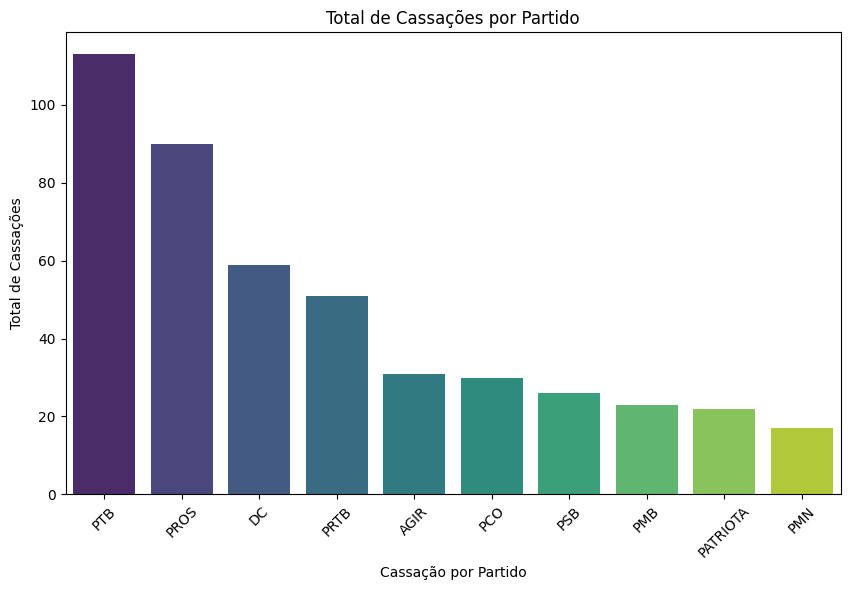

In [206]:
# Agrupar por partido e contar o número de cassações por partido
cassacoes_por_partido = pd.DataFrame(df.groupby('SG_PARTIDO').size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False))
# print(f"Cassação por partido: \n{cassacoes_por_partido}")

# Total de instâncias (número de partidos com cassações)
total_instancias = cassacoes_por_partido.shape[0]
print(f"Total de partidos com candidatos cassados: {total_instancias}")

# Cálculo da média e desvio padrão para o total de cassações por partido
media_cassacoes = cassacoes_por_partido['TOTAL'].mean()
desvio_padrao_cassacoes = cassacoes_por_partido['TOTAL'].std()

print(f"Média de cassações por partido: {media_cassacoes}")
print(f"Desvio padrão de cassações por partido: {desvio_padrao_cassacoes}")

partido_mais_frequente = cassacoes_por_partido['SG_PARTIDO'].value_counts().idxmax()
print(f"Partido mais frequente: {partido_mais_frequente}")

# 1. Cálculo da Variância
# A variância da coluna 'cassacoes'
variancia = cassacoes_por_partido['TOTAL'].var(ddof=1)  # ddof=1 para amostra
print(f"\nVariância: {variancia}")

# 2. Cálculo da Amplitude
# A amplitude é a diferença entre o valor máximo e o valor mínimo
amplitude = cassacoes_por_partido['TOTAL'].max() - cassacoes_por_partido['TOTAL'].min()
print(f"Amplitude: {amplitude}")

display(cassacoes_por_partido.describe().round(8))

top_10_cassacoes_por_partido = cassacoes_por_partido.head(10)

# Plotar o gráfico de barras usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='SG_PARTIDO', y='TOTAL', data=top_10_cassacoes_por_partido, palette='viridis')
plt.xlabel('Cassação por Partido')
plt.ylabel('Total de Cassações')
plt.title('Total de Cassações por Partido')
plt.xticks(rotation=45)
plt.show()

# Perfil mais comum entre candidatos cassados

Total de motivos de cassação distintos: 34
Média de ocorrências por motivo de cassação: 18.352941176470587
Desvio padrão de ocorrências por motivo de cassação: 28.163895168945366
Moda por Gênero: MASCULINO
Moda por Grau de Instrução: SUPERIOR COMPLETO
Moda por Cargo: DEPUTADO ESTADUAL

Variância: 793.2049910873442
Amplitude: 122


,TOTAL
count,34.000000
mean,18.352941
std,28.163895
min,1.000000
25%,1.250000
50%,5.500000
75%,22.750000
max,123.000000


/tmp/ipykernel_26781/699143941.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cassacoes_por_perfil, x='TOTAL', y='DS_CARGO', hue='DS_GENERO', ci=None)


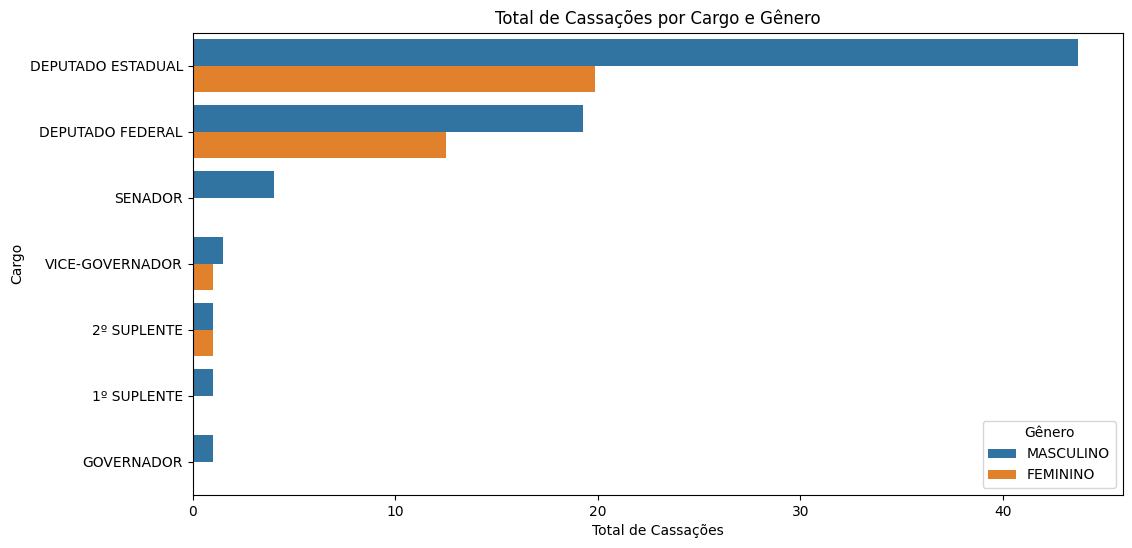

/tmp/ipykernel_26781/699143941.py:58: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cassacoes_por_perfil, x='TOTAL', y='DS_CARGO', hue='DS_GRAU_INSTRUCAO', ci=None)


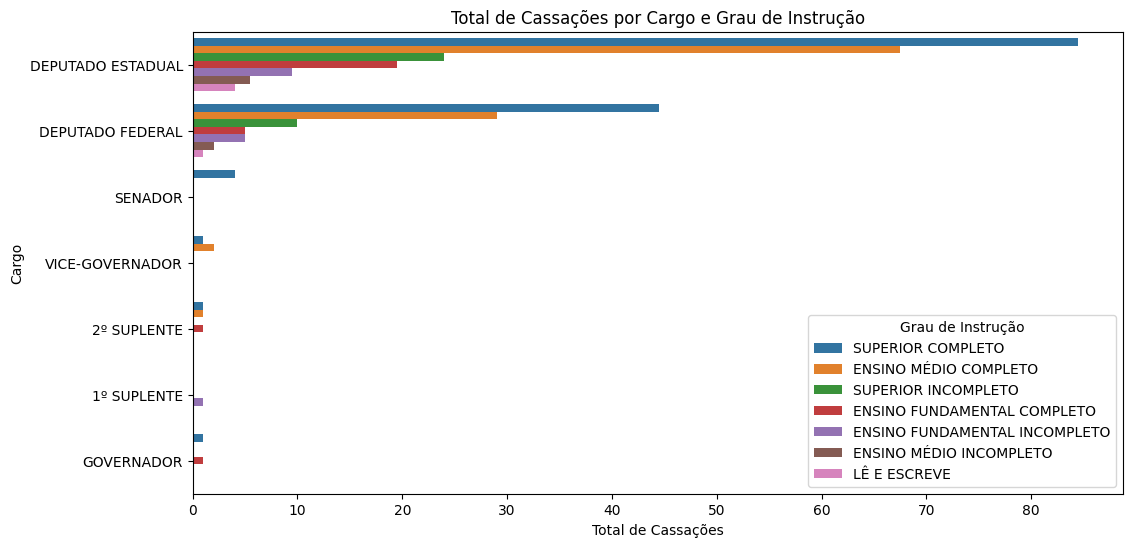

In [207]:
cassacoes_por_perfil = pd.DataFrame(df.groupby(['DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_CARGO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False))
# print(f"Cassação por perfil: \n{cassacoes_por_perfil}")

# Total de instâncias (número de motivos únicos de cassação)
total_instancias = cassacoes_por_perfil.shape[0]
print(f"Total de motivos de cassação distintos: {total_instancias}")

# Cálculo da média e desvio padrão para o total de ocorrências por motivo de cassação
media_ocorrencias = cassacoes_por_perfil['TOTAL'].mean()
desvio_padrao_ocorrencias = cassacoes_por_perfil['TOTAL'].std()

print(f"Média de ocorrências por motivo de cassação: {media_ocorrencias}")
print(f"Desvio padrão de ocorrências por motivo de cassação: {desvio_padrao_ocorrencias}")

# Calculando a moda por gênero
moda_genero = cassacoes_por_perfil['DS_GENERO'].value_counts().idxmax()
print(f"Moda por Gênero: {moda_genero}")

# Calculando a moda por grau de instrução
moda_grau_instrucao = cassacoes_por_perfil['DS_GRAU_INSTRUCAO'].value_counts().idxmax()
print(f"Moda por Grau de Instrução: {moda_grau_instrucao}")

# Calculando a moda por cargo
moda_cargo = cassacoes_por_perfil['DS_CARGO'].value_counts().idxmax()
print(f"Moda por Cargo: {moda_cargo}")

# 1. Cálculo da Variância
# A variância da coluna 'cassacoes'
variancia = cassacoes_por_perfil['TOTAL'].var(ddof=1)  # ddof=1 para amostra
print(f"\nVariância: {variancia}")

# 2. Cálculo da Amplitude
# A amplitude é a diferença entre o valor máximo e o valor mínimo
amplitude = cassacoes_por_perfil['TOTAL'].max() - cassacoes_por_perfil['TOTAL'].min()
print(f"Amplitude: {amplitude}")

display(cassacoes_por_perfil.describe().round(8))


# Criando um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=cassacoes_por_perfil, x='TOTAL', y='DS_CARGO', hue='DS_GENERO', ci=None)

# Adicionando título e rótulos
plt.title('Total de Cassações por Cargo e Gênero')
plt.xlabel('Total de Cassações')
plt.ylabel('Cargo')

# Mostrando a legenda
plt.legend(title='Gênero')

# Exibindo o gráfico
plt.show()


# Criando um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=cassacoes_por_perfil, x='TOTAL', y='DS_CARGO', hue='DS_GRAU_INSTRUCAO', ci=None)

# Adicionando título e rótulos
plt.title('Total de Cassações por Cargo e Grau de Instrução')
plt.xlabel('Total de Cassações')
plt.ylabel('Cargo')

# Mostrando a legenda
plt.legend(title='Grau de Instrução')

# Exibindo o gráfico
plt.show()




# Distribuição de Motivos de Cassação

Motivos de cassação: 
                                           DS_MOTIVO  TOTAL
2                 Ausência de requisito de registro     386
1                            Abuso de poder político    147
3                             Ficha limpa (LC 64/90)     71
4  Indeferimento de partido, federação ou coligação.     19
0                          Abuso de poder (LC 64/90)      1
Total de motivos de cassação distintos: 5
Média de ocorrências por motivo de cassação: 124.8
Desvio padrão de ocorrências por motivo de cassação: 156.63077603076604

Moda de cassações por estado: Ausência de requisito de registro 

Variância: 24533.199999999997
Amplitude: 385


,TOTAL
count,5.000000
mean,124.800000
std,156.630776
min,1.000000
25%,19.000000
50%,71.000000
75%,147.000000
max,386.000000


/tmp/ipykernel_26781/3422716830.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DS_MOTIVO', y='TOTAL', data=cassacoes_por_motivo, palette='viridis')


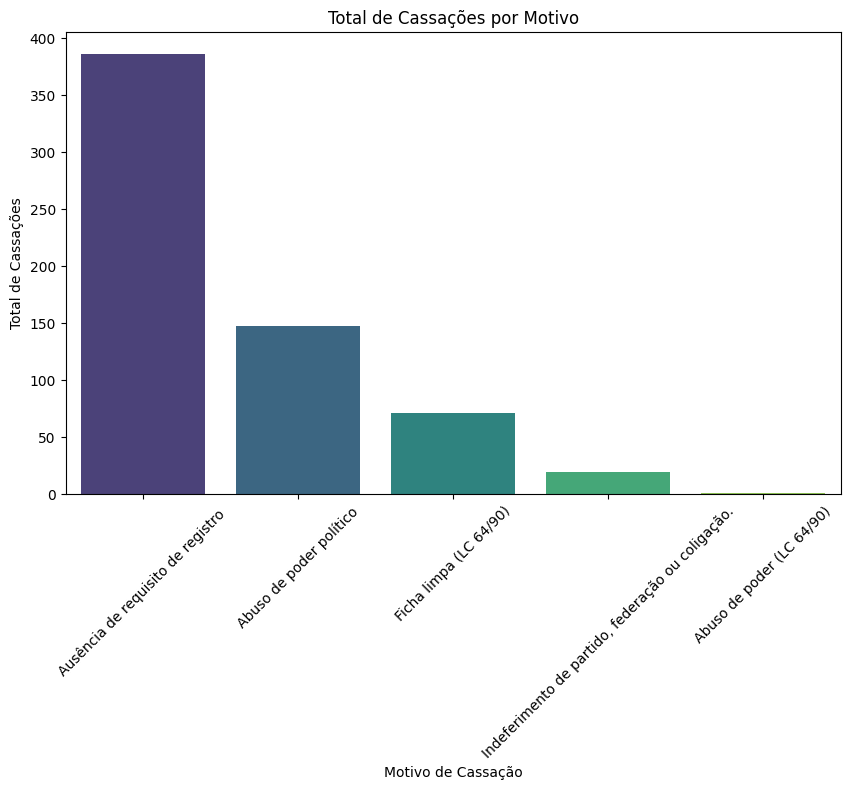

In [208]:
# Agrupar por motivo de cassação e contar o número de ocorrências de cada motivo
cassacoes_por_motivo = pd.DataFrame(df.groupby('DS_MOTIVO').size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False))
print(f"Motivos de cassação: \n{cassacoes_por_motivo}")

# Total de instâncias (número de motivos únicos de cassação)
total_instancias = cassacoes_por_motivo.shape[0]
print(f"Total de motivos de cassação distintos: {total_instancias}")

# Cálculo da média e desvio padrão para o total de ocorrências por motivo de cassação
media_ocorrencias = cassacoes_por_motivo['TOTAL'].mean()
desvio_padrao_ocorrencias = cassacoes_por_motivo['TOTAL'].std()

print(f"Média de ocorrências por motivo de cassação: {media_ocorrencias}")
print(f"Desvio padrão de ocorrências por motivo de cassação: {desvio_padrao_ocorrencias}")

moda = cassacoes_por_motivo['DS_MOTIVO'].value_counts().idxmax()
print(f"\nModa de cassações por estado: {moda}")
# 1. Cálculo da Variância
# A variância da coluna 'cassacoes'
variancia = cassacoes_por_motivo['TOTAL'].var(ddof=1)  # ddof=1 para amostra
print(f"\nVariância: {variancia}")

# 2. Cálculo da Amplitude
# A amplitude é a diferença entre o valor máximo e o valor mínimo
amplitude = cassacoes_por_motivo['TOTAL'].max() - cassacoes_por_motivo['TOTAL'].min()
print(f"Amplitude: {amplitude}")

display(cassacoes_por_motivo.describe().round(8))


top_10_cassacoes_por_motivo = cassacoes_por_motivo.head(10)

# Plotar o gráfico de barras usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='DS_MOTIVO', y='TOTAL', data=cassacoes_por_motivo, palette='viridis')
plt.xlabel('Motivo de Cassação')
plt.ylabel('Total de Cassações')
plt.title('Total de Cassações por Motivo')
plt.xticks(rotation=45)
plt.show()

# Cassações por Turno Eleitoral

In [209]:
# Agrupar por turno eleitoral e contar o número de cassações por turno
cassacoes_por_turno = pd.DataFrame(df.groupby('DS_SIT_TOT_TURNO').size().reset_index(name='TOTAL'))
print(f"Cassação por turno eleitoral: \n{cassacoes_por_turno}")

# Total de instâncias (número de turnos com cassações registradas)
total_instancias = cassacoes_por_turno.shape[0]
print(f"Total de turnos com candidatos cassados: {total_instancias}")

# Cálculo da média e desvio padrão para o total de cassações por turno
media_cassacoes_turno = cassacoes_por_turno['TOTAL'].mean()
desvio_padrao_cassacoes_turno = cassacoes_por_turno['TOTAL'].std()

print(f"Média de cassações por turno: {media_cassacoes_turno}")
print(f"Desvio padrão de cassações por turno: {desvio_padrao_cassacoes_turno}")

moda = cassacoes_por_turno['DS_SIT_TOT_TURNO'].value_counts().idxmax()
print(f"\nModa de cassações por estado: {moda}")
# 1. Cálculo da Variância
# A variância da coluna 'cassacoes'
variancia = cassacoes_por_turno['TOTAL'].var(ddof=1)  # ddof=1 para amostra
print(f"\nVariância: {variancia}")

# 2. Cálculo da Amplitude
# A amplitude é a diferença entre o valor máximo e o valor mínimo
amplitude = cassacoes_por_turno['TOTAL'].max() - cassacoes_por_turno['TOTAL'].min()
print(f"Amplitude: {amplitude}")

display(cassacoes_por_turno.describe().round(8))

Cassação por turno eleitoral: 
  DS_SIT_TOT_TURNO  TOTAL
0           #NULO#    130
1       NÃO ELEITO    494
Total de turnos com candidatos cassados: 2
Média de cassações por turno: 312.0
Desvio padrão de cassações por turno: 257.3868683519033

Moda de cassações por estado: #NULO#

Variância: 66248.0
Amplitude: 364


,TOTAL
count,2.000000
mean,312.000000
std,257.386868
min,130.000000
25%,221.000000
50%,312.000000
75%,403.000000
max,494.000000


# Cassações por Ocupação Anterior

Cassação por ocupação anterior: 
                                          DS_OCUPACAO  TOTAL
57                                             OUTROS    150
34                                         EMPRESÁRIO    104
1                                            ADVOGADO     39
19                                        COMERCIANTE     32
7                APOSENTADO (EXCETO SERVIDOR PÚBLICO)     27
..                                                ...    ...
73  SECRETÁRIO,ESTENÓGRAFO,DATILÓGRAFO,RECEPCIONIS...      1
80                    TRABALHADOR DE CONSTRUÇÃO CIVIL      1
83                   TÉCNICO DE LABORATÓRIO E RAIOS X      1
84                                TÉCNICO DE MECÂNICA      1
85                             TÉCNICO EM EDIFICAÇÕES      1

[89 rows x 2 columns]
Total de ocupações com candidatos cassados: 89
Média de cassações por ocupação: 7.01123595505618
Desvio padrão de cassações por ocupação: 19.660467014488326

Moda de cassações por estado: OUTROS

Variância: 386.5

,TOTAL
count,89.000000
mean,7.011236
std,19.660467
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,150.000000


/tmp/ipykernel_26781/2340397427.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DS_OCUPACAO', y='TOTAL', data=top_10_cassacoes_por_ocupacao, palette='viridis')


DS_OCUPACAO
OUTROS                                                                    1
EMPRESÁRIO                                                                1
ADVOGADO                                                                  1
COMERCIANTE                                                               1
APOSENTADO (EXCETO SERVIDOR PÚBLICO)                                      1
                                                                         ..
SECRETÁRIO,ESTENÓGRAFO,DATILÓGRAFO,RECEPCIONISTA,TELEFONISTA,TAQUÍGRAF    1
TRABALHADOR DE CONSTRUÇÃO CIVIL                                           1
TÉCNICO DE LABORATÓRIO E RAIOS X                                          1
TÉCNICO DE MECÂNICA                                                       1
TÉCNICO EM EDIFICAÇÕES                                                    1
Name: count, Length: 89, dtype: int64


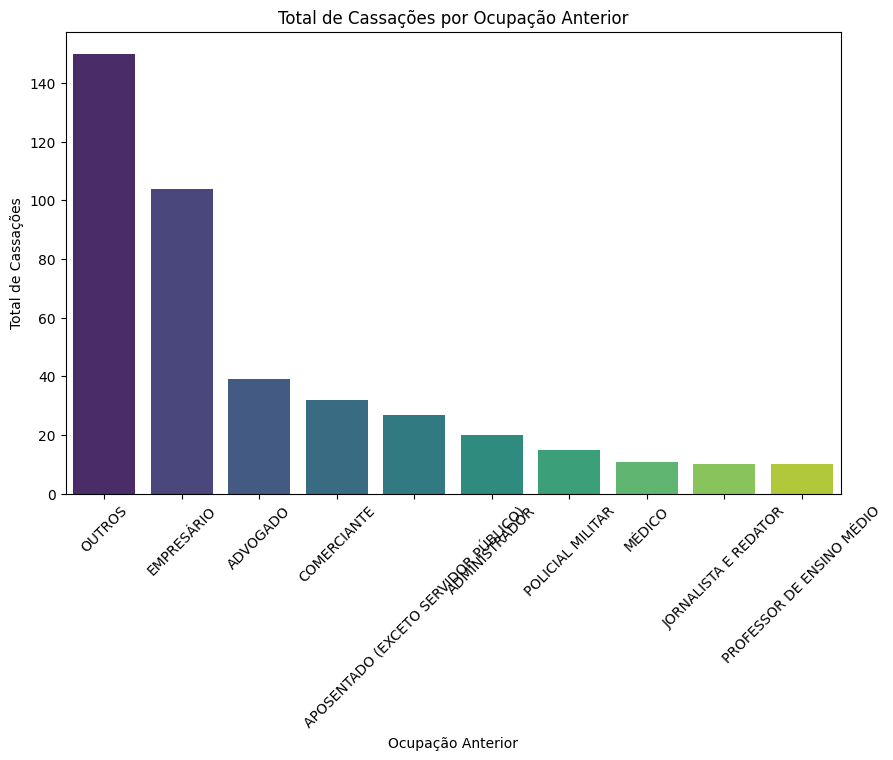

In [210]:
# Agrupar por ocupação anterior e contar o número de cassações por ocupação
cassacoes_por_ocupacao = pd.DataFrame(df.groupby('DS_OCUPACAO').size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False))
print(f"Cassação por ocupação anterior: \n{cassacoes_por_ocupacao}")

# Total de instâncias (número de ocupações com cassações registradas)
total_instancias = cassacoes_por_ocupacao.shape[0]
print(f"Total de ocupações com candidatos cassados: {total_instancias}")

# Cálculo da média e desvio padrão para o total de cassações por ocupação
media_cassacoes_ocupacao = cassacoes_por_ocupacao['TOTAL'].mean()
desvio_padrao_cassacoes_ocupacao = cassacoes_por_ocupacao['TOTAL'].std()

print(f"Média de cassações por ocupação: {media_cassacoes_ocupacao}")
print(f"Desvio padrão de cassações por ocupação: {desvio_padrao_cassacoes_ocupacao}")


moda = cassacoes_por_ocupacao['DS_OCUPACAO'].value_counts().idxmax()
print(f"\nModa de cassações por estado: {moda}")
# 1. Cálculo da Variância
# A variância da coluna 'cassacoes'
variancia = cassacoes_por_ocupacao['TOTAL'].var(ddof=1)  # ddof=1 para amostra
print(f"\nVariância: {variancia}")

# 2. Cálculo da Amplitude
# A amplitude é a diferença entre o valor máximo e o valor mínimo
amplitude = cassacoes_por_ocupacao['TOTAL'].max() - cassacoes_por_ocupacao['TOTAL'].min()
print(f"Amplitude: {amplitude}")

display(cassacoes_por_ocupacao.describe().round(8))

print(cassacoes_por_ocupacao['DS_OCUPACAO'].value_counts())

# cria um gráfico de barras com a frequência de cada classe
# sns.countplot(x="ocupacao", data=cassacoes_por_ocupacao)

top_10_cassacoes_por_ocupacao = cassacoes_por_ocupacao.head(10)

# Plotar o gráfico de barras usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='DS_OCUPACAO', y='TOTAL', data=top_10_cassacoes_por_ocupacao, palette='viridis')
plt.xlabel('Ocupação Anterior')
plt.ylabel('Total de Cassações')
plt.title('Total de Cassações por Ocupação Anterior')
plt.xticks(rotation=45)
plt.show()


Cassação por ocupação anterior: 
     DS_COR_RACA  TOTAL
1         BRANCA    329
3          PARDA    178
4          PRETA    113
0        AMARELA      2
2  NÃO INFORMADO      2
Total de ocupações com candidatos cassados: 5
Média de cassações por ocupação: 124.8
Desvio padrão de cassações por ocupação: 136.7724387440686

Moda de cassações por estado: BRANCA

Variância: 18706.699999999997
Amplitude: 327


,TOTAL
count,5.000000
mean,124.800000
std,136.772439
min,2.000000
25%,2.000000
50%,113.000000
75%,178.000000
max,329.000000


DS_COR_RACA
BRANCA           1
PARDA            1
PRETA            1
AMARELA          1
NÃO INFORMADO    1
Name: count, dtype: int64


/tmp/ipykernel_26781/1758543474.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DS_COR_RACA', y='TOTAL', data=top_10_cassacoes_por_raca, palette='viridis')


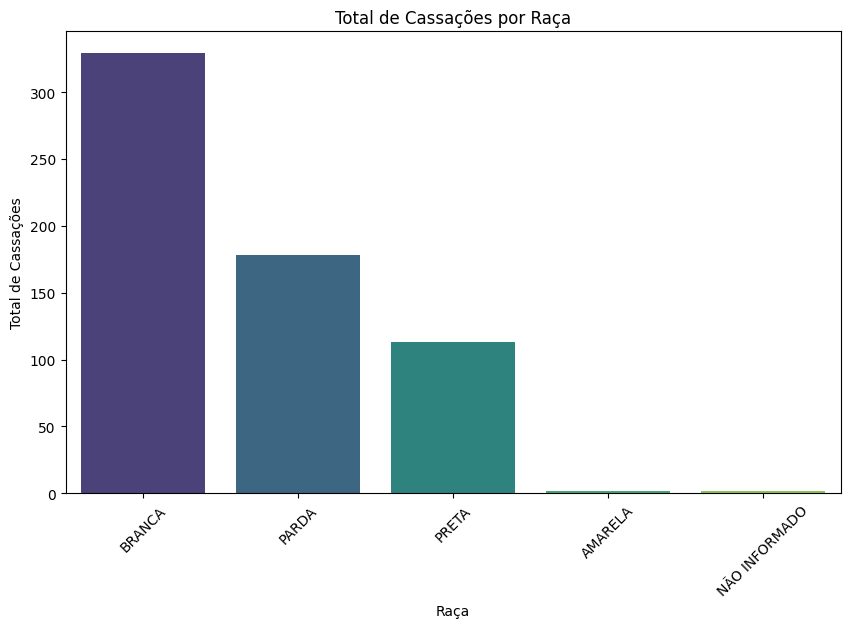

     DS_COR_RACA  TOTAL  PERCENTUAL
1         BRANCA    329   52.724359
3          PARDA    178   28.525641
4          PRETA    113   18.108974
0        AMARELA      2    0.320513
2  NÃO INFORMADO      2    0.320513


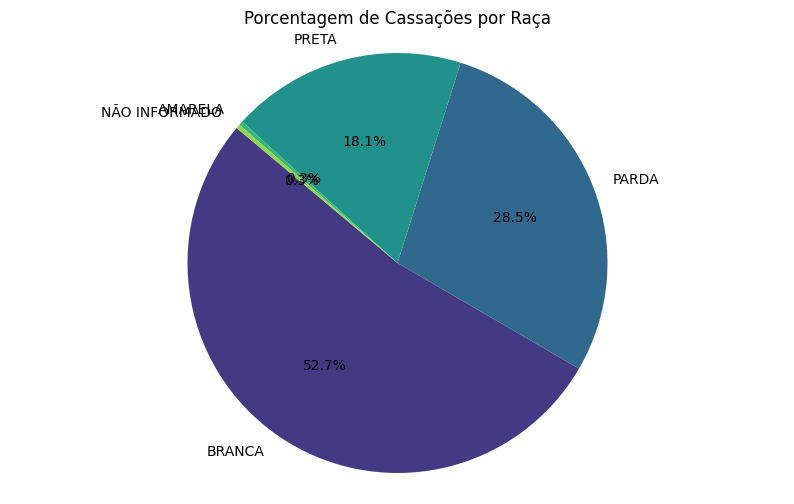

In [211]:
# Agrupar por ocupação anterior e contar o número de cassações por ocupação
cassacoes_por_raca = pd.DataFrame(df.groupby('DS_COR_RACA').size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False))
print(f"Cassação por ocupação anterior: \n{cassacoes_por_raca}")

# Total de instâncias (número de ocupações com cassações registradas)
total_instancias = cassacoes_por_raca.shape[0]
print(f"Total de ocupações com candidatos cassados: {total_instancias}")

# Cálculo da média e desvio padrão para o total de cassações por ocupação
media_cassacoes_ocupacao = cassacoes_por_raca['TOTAL'].mean()
desvio_padrao_cassacoes_ocupacao = cassacoes_por_raca['TOTAL'].std()

print(f"Média de cassações por ocupação: {media_cassacoes_ocupacao}")
print(f"Desvio padrão de cassações por ocupação: {desvio_padrao_cassacoes_ocupacao}")


moda = cassacoes_por_raca['DS_COR_RACA'].value_counts().idxmax()
print(f"\nModa de cassações por estado: {moda}")
# 1. Cálculo da Variância
# A variância da coluna 'cassacoes'
variancia = cassacoes_por_raca['TOTAL'].var(ddof=1)  # ddof=1 para amostra
print(f"\nVariância: {variancia}")

# 2. Cálculo da Amplitude
# A amplitude é a diferença entre o valor máximo e o valor mínimo
amplitude = cassacoes_por_raca['TOTAL'].max() - cassacoes_por_raca['TOTAL'].min()
print(f"Amplitude: {amplitude}")

display(cassacoes_por_raca.describe().round(8))

print(cassacoes_por_raca['DS_COR_RACA'].value_counts())

# cria um gráfico de barras com a frequência de cada classe
# sns.countplot(x="ocupacao", data=cassacoes_por_ocupacao)

top_10_cassacoes_por_raca = cassacoes_por_raca.head(10)

# Plotar o gráfico de barras usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='DS_COR_RACA', y='TOTAL', data=top_10_cassacoes_por_raca, palette='viridis')
plt.xlabel('Raça')
plt.ylabel('Total de Cassações')
plt.title('Total de Cassações por Raça')
plt.xticks(rotation=45)
plt.show()


# Calcular a porcentagem de cada categoria em relação ao total
cassacoes_por_raca['PERCENTUAL'] = (cassacoes_por_raca['TOTAL'] / cassacoes_por_raca['TOTAL'].sum()) * 100

# Exibir o DataFrame com as porcentagens
print(cassacoes_por_raca)

# Plotar o gráfico de pizza usando matplotlib
plt.figure(figsize=(10, 6))
plt.pie(cassacoes_por_raca['PERCENTUAL'], labels=cassacoes_por_raca['DS_COR_RACA'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(cassacoes_por_raca)))
plt.title('Porcentagem de Cassações por Raça')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Estatísticas

Agora os dados serão normalizados, e então, serão analisadas as informações estatísticas novamente.

### Cassação por Estado

In [212]:
from sklearn.preprocessing import StandardScaler
# não faz sentido concatenar os dataframes, pois eles possuem diferentes estrutura e significado

# Renomeando as colunas antes de concatenar
cassacoes_por_estado_normalizado = cassacoes_por_estado.rename(columns={'TOTAL': 'TOTAL_ESTADO'})

# Selecionar apenas os atributos numéricos
atributos_numericos = cassacoes_por_estado_normalizado.select_dtypes(include=['float64', 'int64']).columns

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar a normalização z-score aos atributos numéricos
cassacoes_por_estado_normalizado[atributos_numericos] = scaler.fit_transform(cassacoes_por_estado_normalizado[atributos_numericos])

print("Resultados cassacoes_por_estado normalizados:")
display(cassacoes_por_estado)
display(cassacoes_por_estado_normalizado)
display(cassacoes_por_estado_normalizado.describe().round(5))

Resultados cassacoes_por_estado normalizados:


,SG_UF,TOTAL
3,SP,368
2,RJ,143
1,MG,83
0,ES,30


,SG_UF,TOTAL_ESTADO
3,SP,1.646456
2,RJ,-0.100962
1,MG,-0.566940
0,ES,-0.978554


,TOTAL_ESTADO
count,4.00000
mean,-0.00000
std,1.15470
min,-0.97855
25%,-0.66984
50%,-0.33395
75%,0.33589
max,1.64646


Resultado

Distribuição dos Dados: A distribuição dos dados é bastante dispersa, com valores que vão de negativos (-0.97855) a positivos (1.64646). Isso pode indicar que a normalização dos dados foi feita corretamente, mas que há uma ampla variação nos dados originais antes da normalização.

Normalização: O fato de a média ser zero e o desvio padrão ser acima de 1 mostra que os dados são bem distribuídos e que a normalização ajustou os dados para que fiquem centrados em torno de zero, mas com uma certa variação ao redor desse valor central.

Implicações: A presença de valores negativos e positivos sugere que os dados originais podem ter uma ampla gama de valores, possivelmente devido a fatores externos ou categorias diversas que influenciam TOTAL_ESTADO. A normalização ajuda a balancear essas diferenças para facilitar análises comparativas.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Cassação por Motivo da Cassação

In [213]:
# Renomeando as colunas antes de concatenar
cassacoes_por_motivo_normalizado = cassacoes_por_motivo.rename(columns={'TOTAL': 'TOTAL_MOTIVO'})

# Selecionar apenas os atributos numéricos
atributos_numericos = cassacoes_por_motivo_normalizado.select_dtypes(include=['float64', 'int64']).columns

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar a normalização z-score aos atributos numéricos
cassacoes_por_motivo_normalizado[atributos_numericos] = scaler.fit_transform(cassacoes_por_motivo_normalizado[atributos_numericos])

print("Resultados cassacoes_por_motivo normalizados:")
display(cassacoes_por_motivo)
display(cassacoes_por_motivo_normalizado)
display(cassacoes_por_motivo_normalizado.describe().round(5))

Resultados cassacoes_por_motivo normalizados:


,DS_MOTIVO,TOTAL
2,Ausência de requisito de registro,386
1,Abuso de poder político,147
3,Ficha limpa (LC 64/90),71
4,"Indeferimento de partido, federação ou coligação.",19
0,Abuso de poder (LC 64/90),1


,DS_MOTIVO,TOTAL_MOTIVO
2,Ausência de requisito de registro,1.864451
1,Abuso de poder político,0.158464
3,Ficha limpa (LC 64/90),-0.384026
4,"Indeferimento de partido, federação ou coligação.",-0.755203
0,Abuso de poder (LC 64/90),-0.883687


,TOTAL_MOTIVO
count,5.00000
mean,0.00000
std,1.11803
min,-0.88369
25%,-0.75520
50%,-0.38403
75%,0.15846
max,1.86445


Resultado

Distribuição dos Dados: A distribuição dos dados é bastante dispersa (variando de valores negativos a valores positivos), o que indica que os dados originalmente tinham uma amplitude ampla antes de serem normalizados.

Normalização: A média de zero e o desvio padrão de aproximadamente 1 sugerem que a normalização foi realizada para ajustar os dados para uma distribuição centrada em torno de zero, com variação considerável em ambos os lados da média.

Implicações: A presença de valores negativos e positivos indica que os dados originais podem ter uma gama de valores muito diversificados, possivelmente devido a diferentes fatores ou categorias que influenciam TOTAL_MOTIVO. A normalização ajuda a comparar diferentes conjuntos de dados de forma mais equitativa, já que ajusta as diferenças de escala.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Cassação por Perfil do Candidato

In [214]:
# Renomeando as colunas antes de concatenar
cassacoes_por_perfil_normalizado = cassacoes_por_perfil.rename(columns={'TOTAL': 'TOTAL_PERFIL'})

# Selecionar apenas os atributos numéricos
atributos_numericos = cassacoes_por_perfil_normalizado.select_dtypes(include=['float64', 'int64']).columns

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar a normalização z-score aos atributos numéricos
cassacoes_por_perfil_normalizado[atributos_numericos] = scaler.fit_transform(cassacoes_por_perfil_normalizado[atributos_numericos])

print("Resultados cassacoes_por_perfil normalizados:")
display(cassacoes_por_perfil)
display(cassacoes_por_perfil_normalizado)
display(cassacoes_por_perfil_normalizado.describe().round(5))

Resultados cassacoes_por_perfil normalizados:


,DS_GENERO,DS_GRAU_INSTRUCAO,DS_CARGO,TOTAL
27,MASCULINO,SUPERIOR COMPLETO,DEPUTADO ESTADUAL,123
20,MASCULINO,ENSINO MÉDIO COMPLETO,DEPUTADO ESTADUAL,94
28,MASCULINO,SUPERIOR COMPLETO,DEPUTADO FEDERAL,61
21,MASCULINO,ENSINO MÉDIO COMPLETO,DEPUTADO FEDERAL,47
7,FEMININO,SUPERIOR COMPLETO,DEPUTADO ESTADUAL,46
3,FEMININO,ENSINO MÉDIO COMPLETO,DEPUTADO ESTADUAL,41
32,MASCULINO,SUPERIOR INCOMPLETO,DEPUTADO ESTADUAL,38
8,FEMININO,SUPERIOR COMPLETO,DEPUTADO FEDERAL,28
13,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,DEPUTADO ESTADUAL,25
17,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,DEPUTADO ESTADUAL,16


,DS_GENERO,DS_GRAU_INSTRUCAO,DS_CARGO,TOTAL_PERFIL
27,MASCULINO,SUPERIOR COMPLETO,DEPUTADO ESTADUAL,3.771523
20,MASCULINO,ENSINO MÉDIO COMPLETO,DEPUTADO ESTADUAL,2.726351
28,MASCULINO,SUPERIOR COMPLETO,DEPUTADO FEDERAL,1.537018
21,MASCULINO,ENSINO MÉDIO COMPLETO,DEPUTADO FEDERAL,1.032452
7,FEMININO,SUPERIOR COMPLETO,DEPUTADO ESTADUAL,0.996411
3,FEMININO,ENSINO MÉDIO COMPLETO,DEPUTADO ESTADUAL,0.816209
32,MASCULINO,SUPERIOR INCOMPLETO,DEPUTADO ESTADUAL,0.708088
8,FEMININO,SUPERIOR COMPLETO,DEPUTADO FEDERAL,0.347684
13,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,DEPUTADO ESTADUAL,0.239563
17,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,DEPUTADO ESTADUAL,-0.084801


,TOTAL_PERFIL
count,34.00000
mean,0.00000
std,1.01504
min,-0.62541
25%,-0.61640
50%,-0.46323
75%,0.15847
max,3.77152


Resultado

Distribuição dos Dados: Os dados de TOTAL_PERFIL têm uma distribuição que vai de valores negativos a positivos, com uma média centrada em zero. Isso pode indicar que, após a normalização, os dados estão razoavelmente distribuídos, mas há uma tendência para valores negativos, com alguns valores mais elevados.

Normalização: A normalização foi bem-sucedida, pois a média de zero e o desvio padrão em torno de 1 indicam que a distribuição está centralizada e ajustada. A presença de valores negativos e positivos sugere que a normalização mantém as diferenças relativas, mas centralizadas ao redor de zero.

Outliers: O valor máximo de 3.77152 pode indicar a presença de outliers positivos, ou seja, valores que se distanciam significativamente dos outros dados. Esses valores podem representar eventos ou características incomuns, dependendo do contexto.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Cassação por Turno

In [215]:
# Renomeando as colunas antes de concatenar
cassacoes_por_turno_normalizado = cassacoes_por_turno.rename(columns={'TOTAL': 'TOTAL_TURNO'})

# Selecionar apenas os atributos numéricos
atributos_numericos = cassacoes_por_turno_normalizado.select_dtypes(include=['float64', 'int64']).columns

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar a normalização z-score aos atributos numéricos
cassacoes_por_turno_normalizado[atributos_numericos] = scaler.fit_transform(cassacoes_por_turno_normalizado[atributos_numericos])

print("Resultados cassacoes_por_turno normalizados:")
display(cassacoes_por_turno)
display(cassacoes_por_turno_normalizado)
display(cassacoes_por_turno_normalizado.describe().round(5))

Resultados cassacoes_por_turno normalizados:


,DS_SIT_TOT_TURNO,TOTAL
0,#NULO#,130
1,NÃO ELEITO,494


,DS_SIT_TOT_TURNO,TOTAL_TURNO
0,#NULO#,-1.0
1,NÃO ELEITO,1.0


,TOTAL_TURNO
count,2.00000
mean,0.00000
std,1.41421
min,-1.00000
25%,-0.50000
50%,0.00000
75%,0.50000
max,1.00000


Resultado

Distribuição dos Dados: A distribuição dos dados é bastante equilibrada, com valores variando entre -1 e 1. Isso pode indicar que, após a normalização, os dados têm uma distribuição centrada em torno de zero, com variação tanto negativa quanto positiva.

Normalização: A média de zero e o desvio padrão de 1.41421 indicam que a normalização foi bem-sucedida, ajustando os dados para uma distribuição com média zero e uma dispersão de cerca de 1. A distribuição é mais equilibrada devido à presença de valores negativos e positivos.

Tamanho do Conjunto de Dados: O número de observações é muito pequeno (apenas 2 dados), o que limita as conclusões que podem ser tiradas sobre a distribuição e a significância dos resultados. Um número maior de dados poderia fornecer uma visão mais clara da distribuição dos valores de TOTAL_TURNO.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Cassação por Ocupação

In [216]:
# Renomeando as colunas antes de concatenar
cassacoes_por_ocupacao_normalizado = cassacoes_por_ocupacao.rename(columns={'TOTAL': 'TOTAL_OCUPACAO'})

# Selecionar apenas os atributos numéricos
atributos_numericos = cassacoes_por_ocupacao_normalizado.select_dtypes(include=['float64', 'int64']).columns

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar a normalização z-score aos atributos numéricos
cassacoes_por_ocupacao_normalizado[atributos_numericos] = scaler.fit_transform(cassacoes_por_ocupacao_normalizado[atributos_numericos])

print("Resultados cassacoes_por_ocupacao normalizados:")
display(cassacoes_por_ocupacao)
display(cassacoes_por_ocupacao_normalizado)
display(cassacoes_por_ocupacao_normalizado.describe().round(5))



Resultados cassacoes_por_ocupacao normalizados:


,DS_OCUPACAO,TOTAL
57,OUTROS,150
34,EMPRESÁRIO,104
1,ADVOGADO,39
19,COMERCIANTE,32
7,APOSENTADO (EXCETO SERVIDOR PÚBLICO),27
...,...,...
73,"SECRETÁRIO,ESTENÓGRAFO,DATILÓGRAFO,RECEPCIONIS...",1
80,TRABALHADOR DE CONSTRUÇÃO CIVIL,1
83,TÉCNICO DE LABORATÓRIO E RAIOS X,1
84,TÉCNICO DE MECÂNICA,1


,DS_OCUPACAO,TOTAL_OCUPACAO
57,OUTROS,7.314114
34,EMPRESÁRIO,4.961137
1,ADVOGADO,1.636279
19,COMERCIANTE,1.278217
7,APOSENTADO (EXCETO SERVIDOR PÚBLICO),1.022459
...,...,...
73,"SECRETÁRIO,ESTENÓGRAFO,DATILÓGRAFO,RECEPCIONIS...",-0.307485
80,TRABALHADOR DE CONSTRUÇÃO CIVIL,-0.307485
83,TÉCNICO DE LABORATÓRIO E RAIOS X,-0.307485
84,TÉCNICO DE MECÂNICA,-0.307485


,TOTAL_OCUPACAO
count,89.00000
mean,0.00000
std,1.00567
min,-0.30748
25%,-0.30748
50%,-0.25633
75%,-0.10288
max,7.31411


Resultado

Distribuição dos Dados: A distribuição dos dados é bastante concentrada em torno de zero, com valores negativos dominando a maior parte dos dados, mas a presença de um valor máximo muito alto indica a possibilidade de outliers ou valores extremos positivos no conjunto de dados.

Normalização: A média de zero e o desvio padrão de 1.00567 indicam que a normalização foi realizada corretamente, com os dados centrados em torno de zero e uma dispersão moderada em relação a esse valor central.

Outliers: O valor máximo de 7.31411 é um indicativo claro de que outliers positivos existem nos dados, o que pode ser relevante dependendo do contexto da análise. Esse valor é muito mais alto que a maioria dos outros dados, o que pode exigir uma análise mais cuidadosa.

Conclusão


Podemos ver acima que a média (*mean*) ficou igual a 0 e o desvio padrão (*std*) proximo a 1. 
Em alguns casos, a média fica -0, e pode ser alguns motivos:
* -0 é, na maioria das vezes, um efeito de precisão numérica em cálculos de ponto flutuante, onde o valor é muito pequeno, mas a representação interna do número é ligeiramente negativa.
* Isso é comum em computação devido à limitação na precisão dos números flutuantes e ao arredondamento durante operações matemáticas.
* Para evitar que isso seja exibido, você pode arredondar os valores ou formatar a exibição para garantir que 0 seja mostrado.


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Cassação por Raça

In [217]:
# Renomeando as colunas antes de concatenar
cassacoes_por_raca_normalizado = cassacoes_por_raca.rename(columns={'TOTAL': 'TOTAL_RACA'})

# Selecionar apenas os atributos numéricos
atributos_numericos = cassacoes_por_raca_normalizado.select_dtypes(include=['float64', 'int64']).columns

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar a normalização z-score aos atributos numéricos
cassacoes_por_raca_normalizado[atributos_numericos] = scaler.fit_transform(cassacoes_por_raca_normalizado[atributos_numericos])

print("Resultados cassacoes_por_ocupacao normalizados:")
display(cassacoes_por_raca)
display(cassacoes_por_raca_normalizado)
display(cassacoes_por_raca_normalizado.describe().round(5))


Resultados cassacoes_por_ocupacao normalizados:


,DS_COR_RACA,TOTAL,PERCENTUAL
1,BRANCA,329,52.724359
3,PARDA,178,28.525641
4,PRETA,113,18.108974
0,AMARELA,2,0.320513
2,NÃO INFORMADO,2,0.320513


,DS_COR_RACA,TOTAL_RACA,PERCENTUAL
1,BRANCA,1.669215,1.669215
3,PARDA,0.434879,0.434879
4,PRETA,-0.096458,-0.096458
0,AMARELA,-1.003818,-1.003818
2,NÃO INFORMADO,-1.003818,-1.003818


,TOTAL_RACA,PERCENTUAL
count,5.00000,5.00000
mean,0.00000,0.00000
std,1.11803,1.11803
min,-1.00382,-1.00382
25%,-1.00382,-1.00382
50%,-0.09646,-0.09646
75%,0.43488,0.43488
max,1.66921,1.66921


Resultado

A normalização dos dados resultou em uma média de zero e um desvio padrão de 1, o que é esperado. As categorias variam consideravelmente, com a categoria BRANCA sendo a mais representativa e dominando os dados (com um valor positivo significativo), enquanto as categorias AMARELA e NÃO INFORMADO são as menos representativas no conjunto de dados.

Distribuição: A normalização mostrou que os dados de TOTAL_OCUPACAO estão amplamente concentrados em torno de zero, com algumas categorias, como BRANCA, apresentando distâncias consideráveis da média, enquanto outras categorias, como AMARELA e NÃO INFORMADO, estão mais próximas ou abaixo da média, refletindo menor representatividade ou outliers.

Implicações: O fato de BRANCA ter um valor muito positivo indica uma dominância dessa categoria nos dados, enquanto categorias como AMARELA e NÃO INFORMADO precisam ser mais analisadas para entender por que estão tão distantes da média. A presença de valores negativos pode sugerir que as categorias de menor frequência ou de "informação ausente" (não preenchida) têm uma influência reduzida no conjunto de dados.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Cassação por Partido

In [218]:
# Renomeando as colunas antes de concatenar
cassacoes_por_partido_normalizado = cassacoes_por_partido.rename(columns={'TOTAL': 'TOTAL_PARTIDO'})

# Selecionar apenas os atributos numéricos
atributos_numericos = cassacoes_por_partido_normalizado.select_dtypes(include=['float64', 'int64']).columns

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar a normalização z-score aos atributos numéricos
cassacoes_por_partido_normalizado[atributos_numericos] = scaler.fit_transform(cassacoes_por_partido_normalizado[atributos_numericos])

print("Resultados cassacoes_por_ocupacao normalizados:")
display(cassacoes_por_partido)
display(cassacoes_por_partido_normalizado)
display(cassacoes_por_partido_normalizado.describe().round(5))


Resultados cassacoes_por_ocupacao normalizados:


,SG_PARTIDO,TOTAL
23,PTB,113
15,PROS,90
3,DC,59
16,PRTB,51
0,AGIR,31
8,PCO,30
17,PSB,26
11,PMB,23
5,PATRIOTA,22
12,PMN,17


,SG_PARTIDO,TOTAL_PARTIDO
23,PTB,3.554723
15,PROS,2.661018
3,DC,1.456458
16,PRTB,1.145604
0,AGIR,0.368469
8,PCO,0.329612
17,PSB,0.174185
11,PMB,0.057615
5,PATRIOTA,0.018758
12,PMN,-0.175525


,TOTAL_PARTIDO
count,29.00000
mean,-0.00000
std,1.01770
min,-0.79723
25%,-0.56409
50%,-0.36981
75%,0.05762
max,3.55472


Resultado 

A normalização dos dados resultou em uma média de zero e um desvio padrão de 1, o que é esperado. As categorias variam consideravelmente, com a categoria BRANCA sendo a mais representativa e dominando os dados (com um valor positivo significativo), enquanto as categorias AMARELA e NÃO INFORMADO são as menos representativas no conjunto de dados.

Distribuição: A normalização mostrou que os dados de TOTAL_OCUPACAO estão amplamente concentrados em torno de zero, com algumas categorias, como BRANCA, apresentando distâncias consideráveis da média, enquanto outras categorias, como AMARELA e NÃO INFORMADO, estão mais próximas ou abaixo da média, refletindo menor representatividade ou outliers.

Implicações: O fato de BRANCA ter um valor muito positivo indica uma dominância dessa categoria nos dados, enquanto categorias como AMARELA e NÃO INFORMADO precisam ser mais analisadas para entender por que estão tão distantes da média (mas já sabemos que provavelmente é pela predominancia da categoria BRANCA em detrimento das outras). A presença de valores negativos pode sugerir que as categorias de menor frequência ou de "informação ausente" (não preenchida) têm uma influência reduzida no conjunto de dados.

# Detecção de *outliers*

Outro passo importante na análise e tratamento dos dados é a detecção de *outliers* (*i.e.*, dados gerados por leituras incorretas, erros de digitação, etc). 

Uma das maneiras mais simples de verificar se os dados contém *outliers* é criar um gráfico box plot de cada atributo.

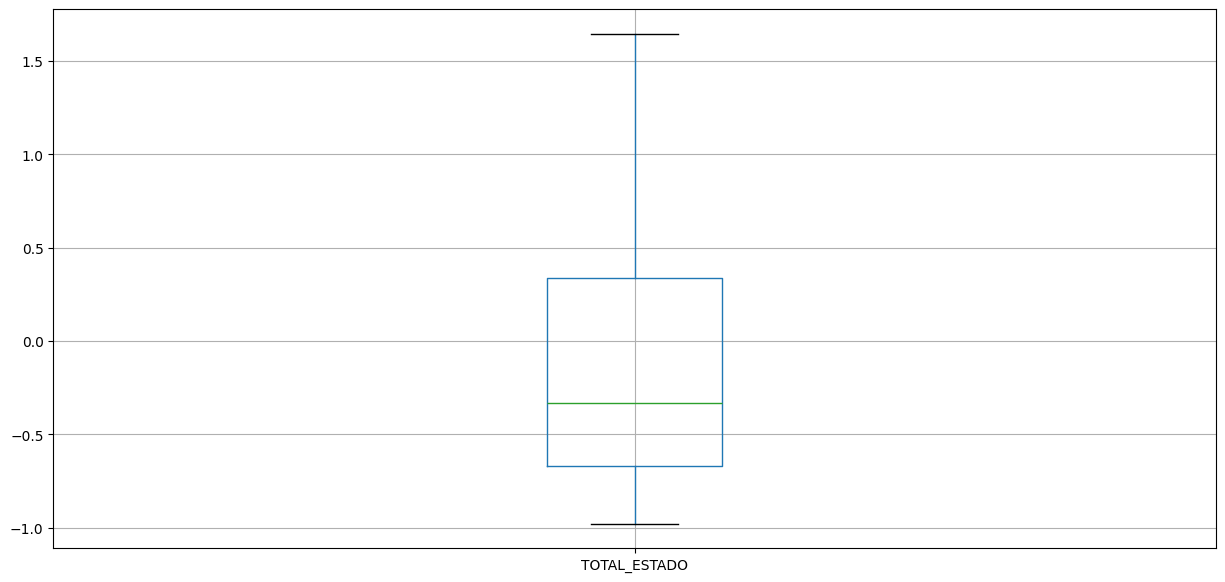

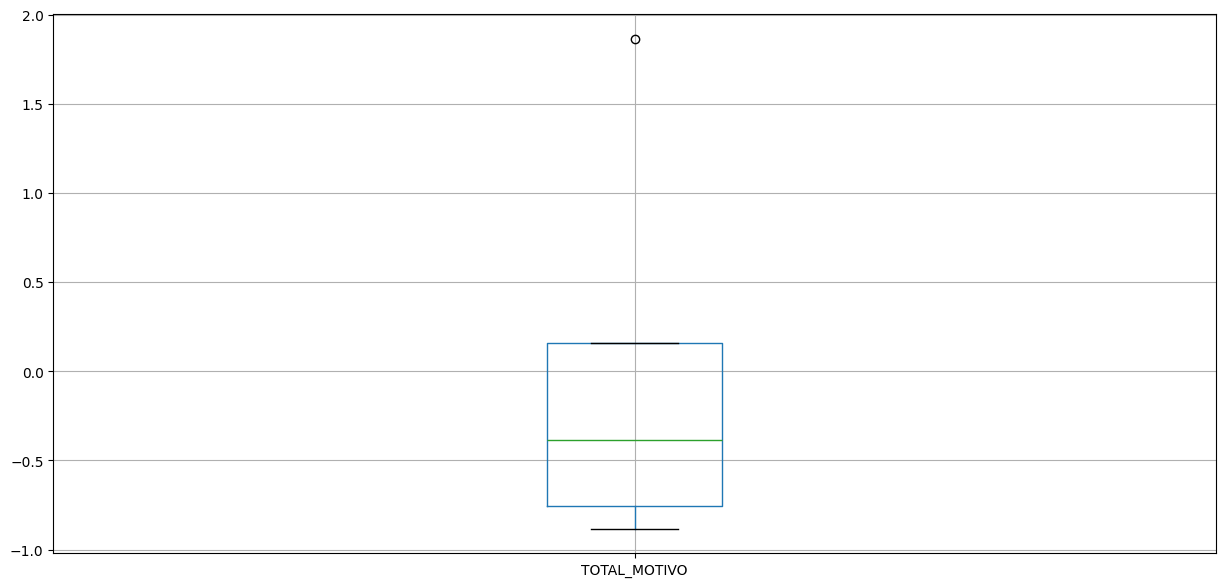

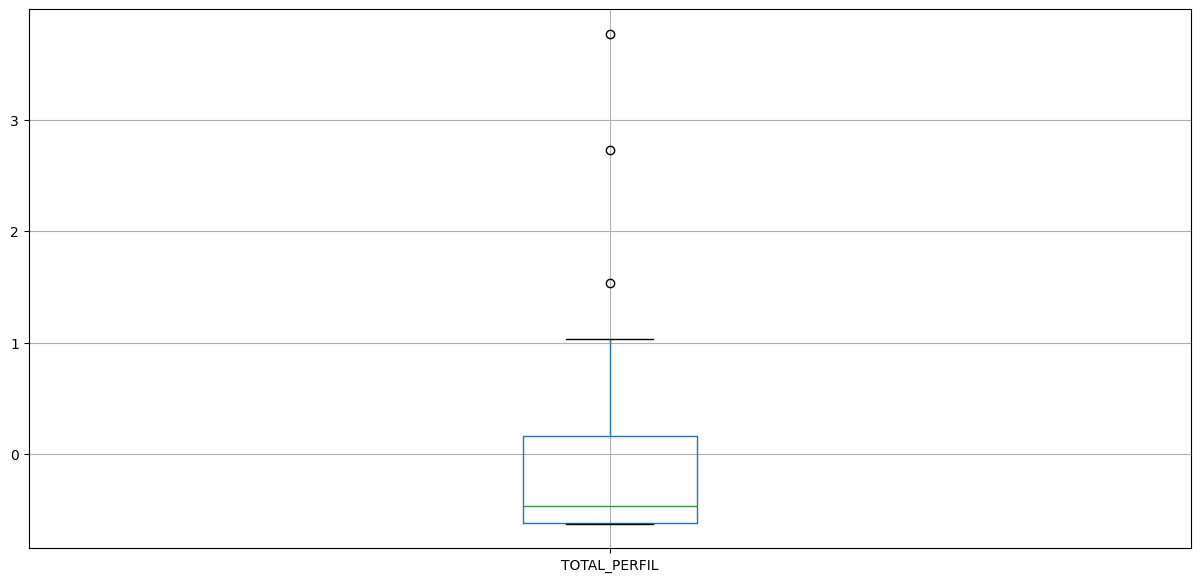

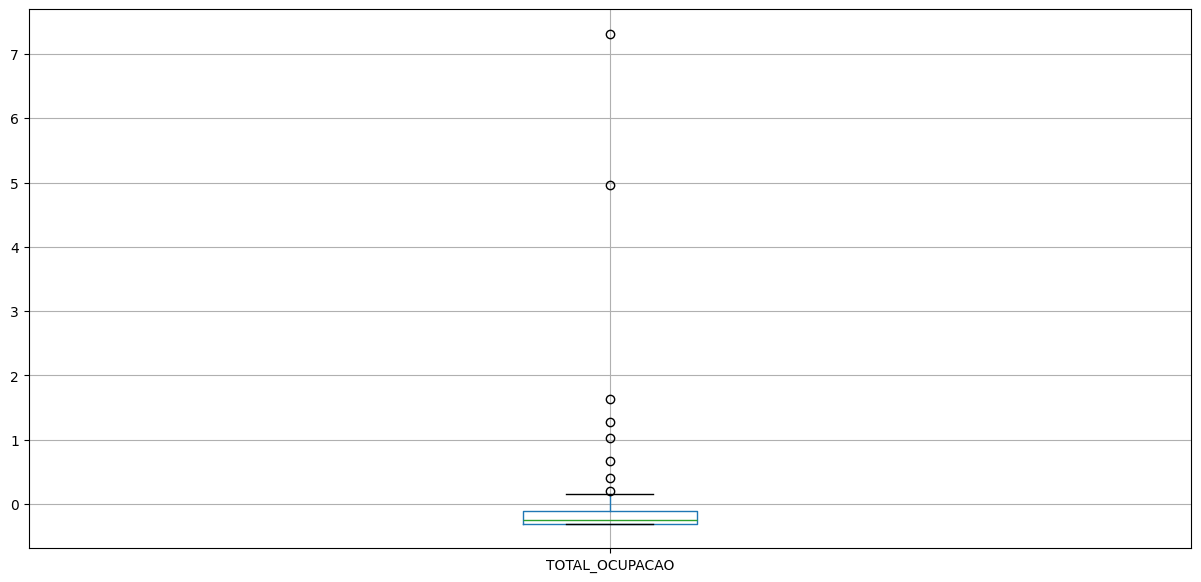

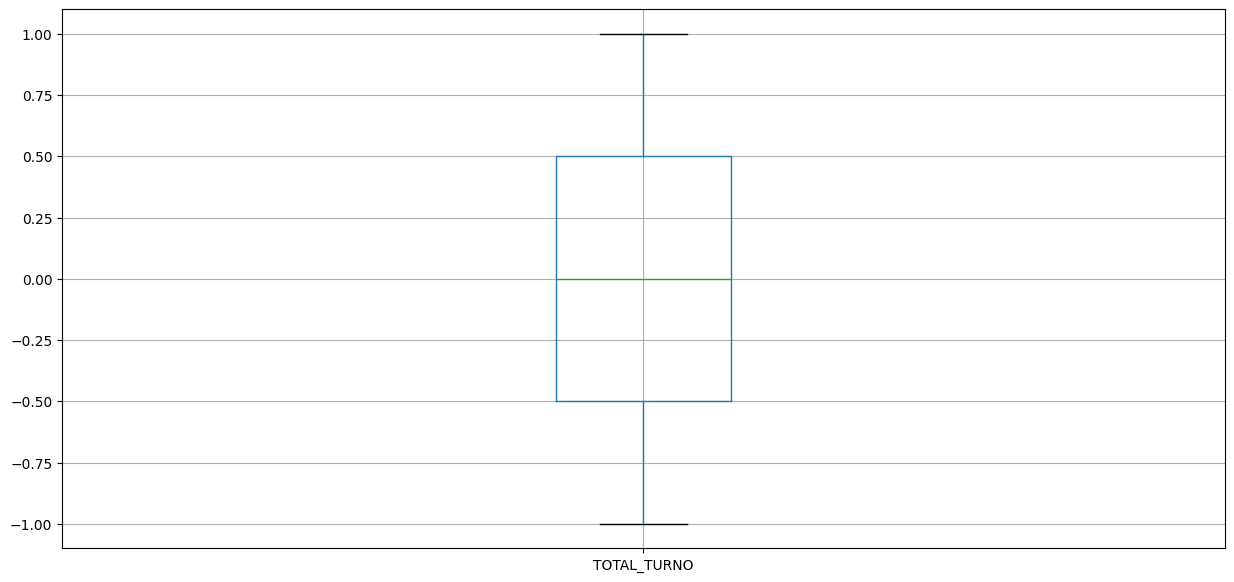

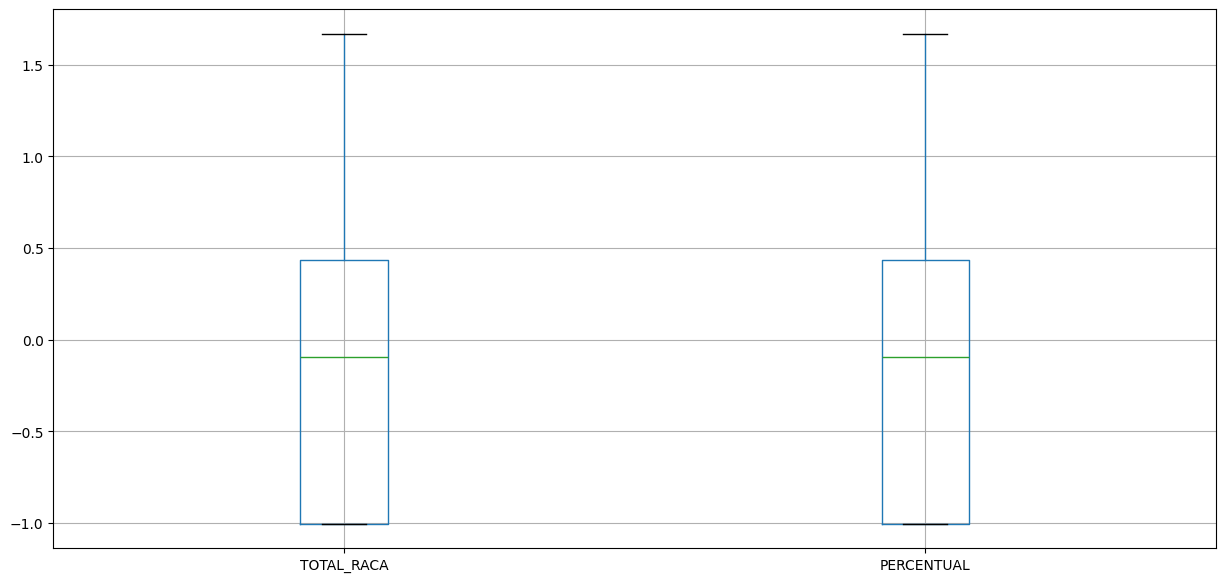

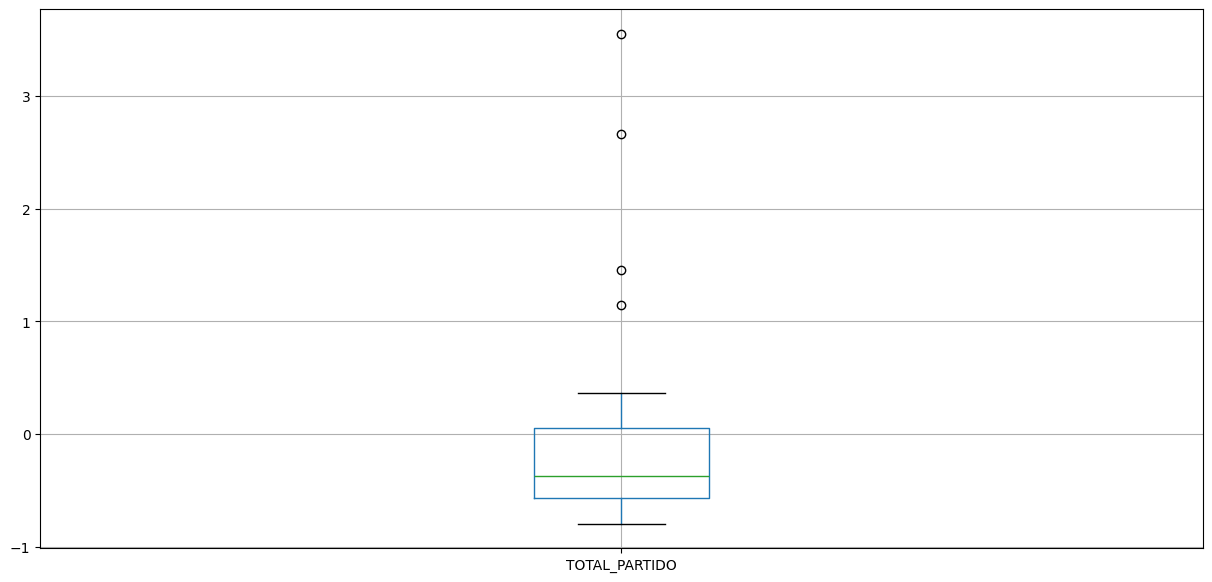

In [254]:
# gera um bloxplot para cada atributo
cassacoes_por_estado_normalizado.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_motivo_normalizado.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_perfil_normalizado.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_ocupacao_normalizado.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_turno_normalizado.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_raca_normalizado.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_partido_normalizado.boxplot(figsize=(15,7))
plt.show()



O box plot está indicando que os atributos `total_motivo`, `total_partido`, `total_perfil` e `total_ocupacao` possuem *outliers*, o que pode prejudicar o desempenho de vários métodos de aprendizado de máquina, pois provavelmente tratam-se de amostras com valores de atributos incorretos. 

Outra forma de analisar se a base de dados contém *outliers* é usar gráficos de dispersão. Podemos plotar gráficos de dispersão a partir dos _dataframes_ utilizando a biblioteca `Seaborn`. Juntamente com essa biblioteca, também é recomendável importar a biblioteca `Matplotlib` para personalizar os gráficos.

Como são conjunto de dados muito distintos entre si, foi utilizado diferentes sns.pairplot para representar a distribuição dessas informações já normalizadas.

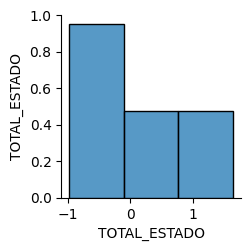

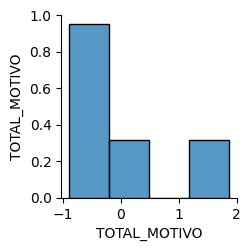

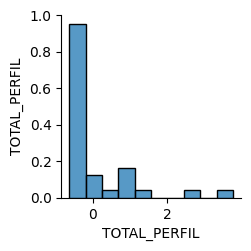

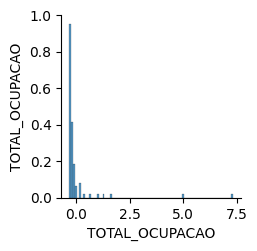

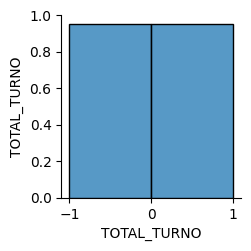

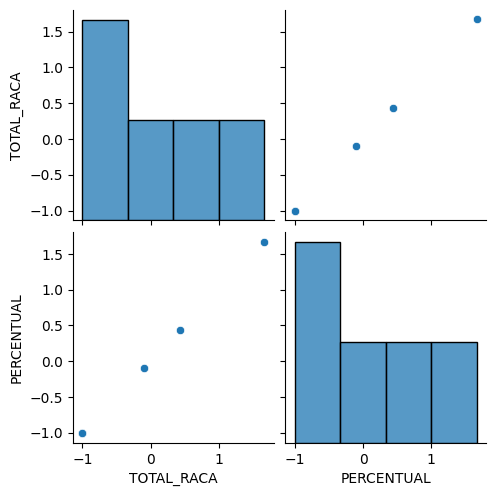

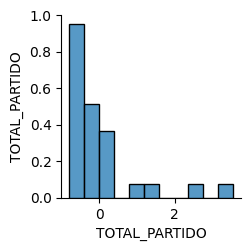

In [ ]:
sns.pairplot(cassacoes_por_estado_normalizado)
plt.show()

sns.pairplot(cassacoes_por_motivo_normalizado)
plt.show()

sns.pairplot(cassacoes_por_perfil_normalizado)
plt.show()

sns.pairplot(cassacoes_por_ocupacao_normalizado)
plt.show()

sns.pairplot(cassacoes_por_turno_normalizado)
plt.show()

sns.pairplot(cassacoes_por_raca_normalizado)
plt.show()

sns.pairplot(cassacoes_por_partido_normalizado)
plt.show()



Pelos gráficos vistos até o momento, fica claro que um dos *outliers* fazem sentido até então, pois são dados onde existe muitos dados para uma categoria em detrimento das outras, ficando muito disperso. 

A bilioteca `Seaborn` permite criar gráficos boxplot agrupados por um determinado atributo, o que facilita a análise dos dados. Abaixo será apresentado todos que apresentaram outliers.

Index(['DS_MOTIVO', 'TOTAL_MOTIVO'], dtype='object')


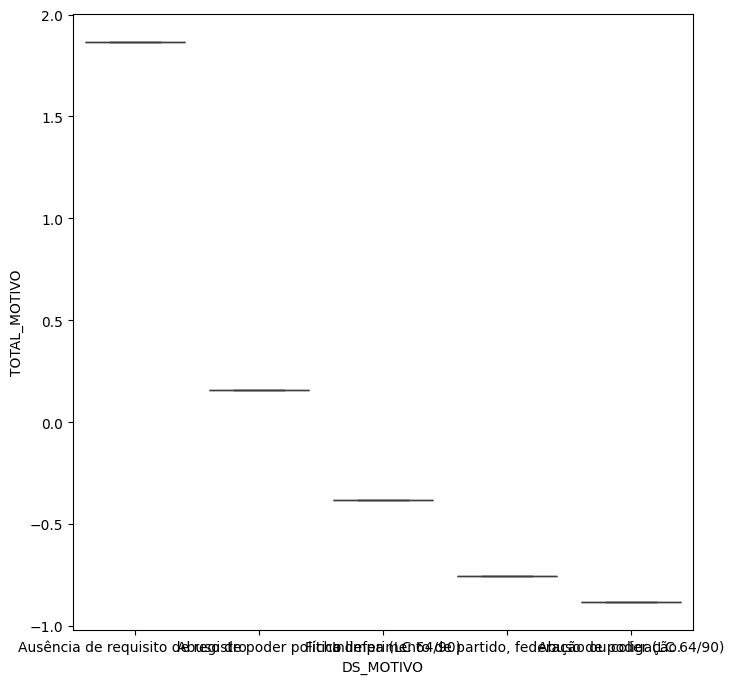

In [247]:
# for atributo in df_dataset.columns[:-1]:
    # define a dimensão do gráfico
print(cassacoes_por_motivo_normalizado.columns)
plt.figure(figsize=(8,8))

# cria o boxplot
sns.boxplot(x="DS_MOTIVO", y='TOTAL_MOTIVO', data=cassacoes_por_motivo_normalizado, whis=1.5)

# mostra o gráfico
plt.show()

Index(['DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_CARGO', 'TOTAL_PERFIL'], dtype='object')


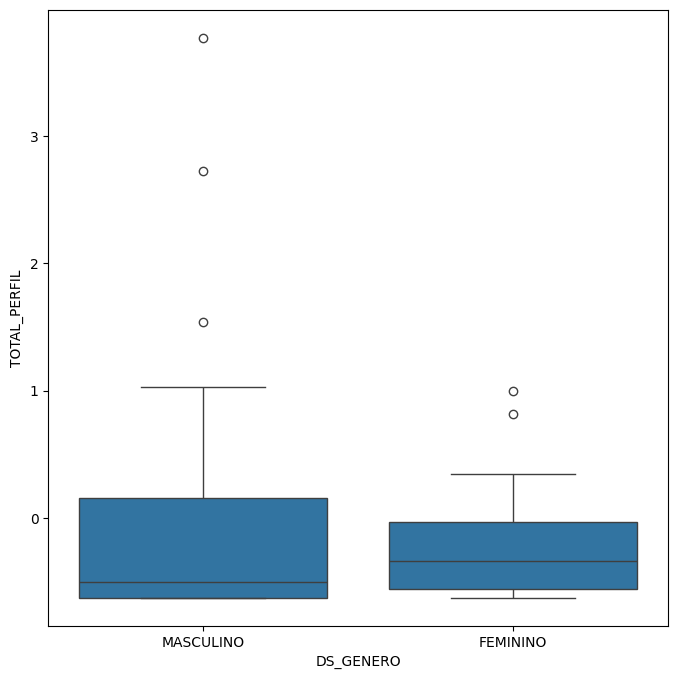

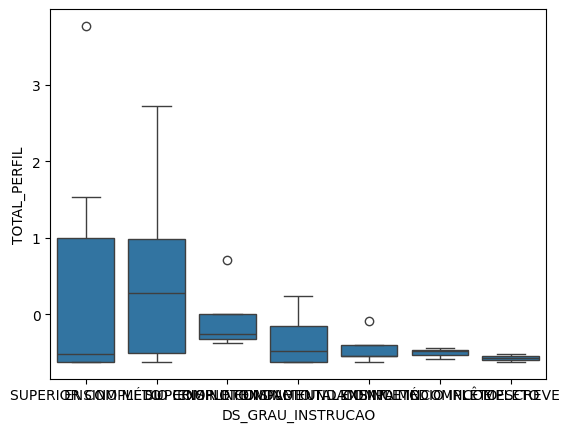

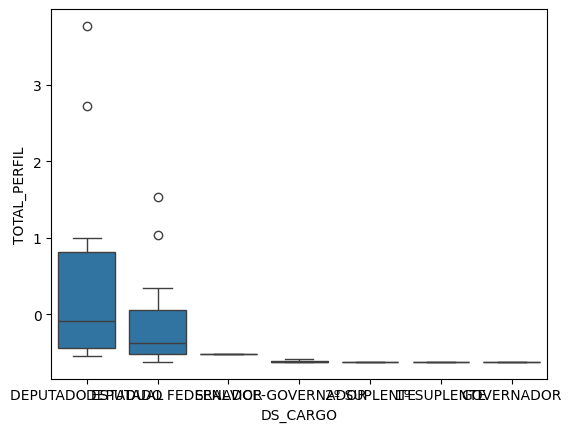

In [251]:
# for atributo in df_dataset.columns[:-1]:
    # define a dimensão do gráfico
print(cassacoes_por_perfil_normalizado.columns)
plt.figure(figsize=(8,8))

sns.boxplot(x="DS_GENERO", y='TOTAL_PERFIL', data=cassacoes_por_perfil_normalizado, whis=1.5)
plt.show()


sns.boxplot(x="DS_GRAU_INSTRUCAO", y='TOTAL_PERFIL', data=cassacoes_por_perfil_normalizado, whis=1.5)
plt.show()


sns.boxplot(x="DS_CARGO", y='TOTAL_PERFIL', data=cassacoes_por_perfil_normalizado, whis=1.5)
plt.show()

Index(['DS_OCUPACAO', 'TOTAL_OCUPACAO'], dtype='object')


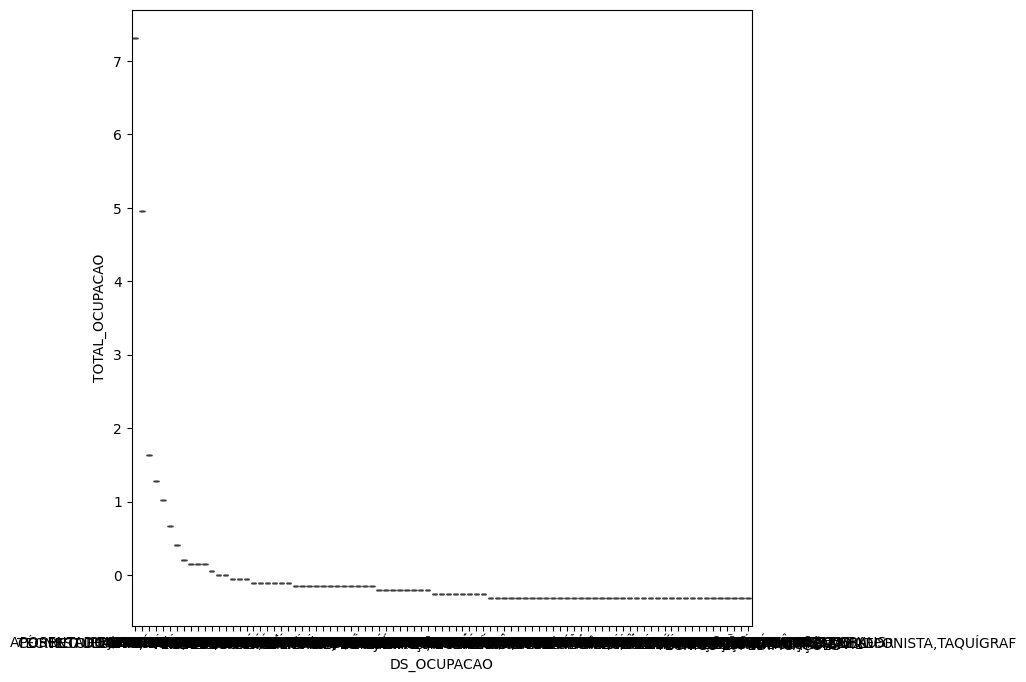

In [257]:
# for atributo in df_dataset.columns[:-1]:
    # define a dimensão do gráfico
print(cassacoes_por_ocupacao_normalizado.columns)
plt.figure(figsize=(8,8))

sns.boxplot(x="DS_OCUPACAO", y='TOTAL_OCUPACAO', data=cassacoes_por_ocupacao_normalizado, whis=1.5)
plt.show()


Index(['SG_PARTIDO', 'TOTAL_PARTIDO'], dtype='object')


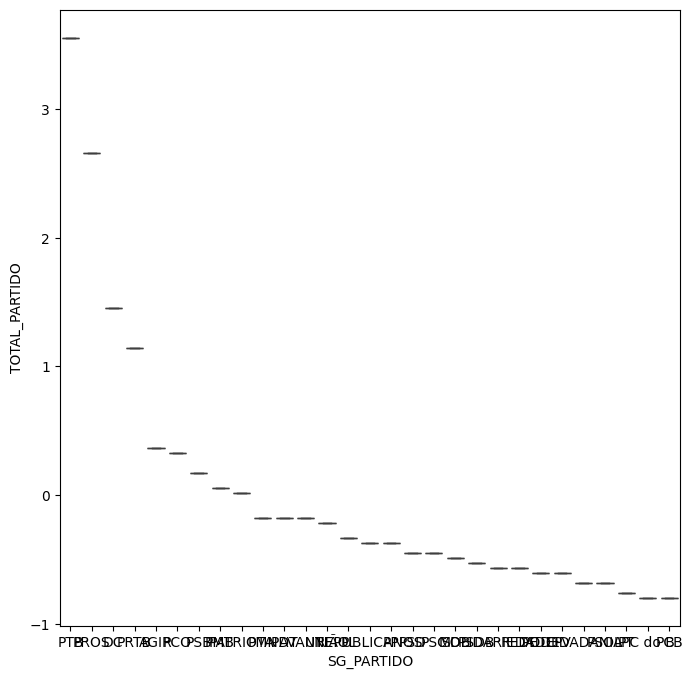

In [259]:
# for atributo in df_dataset.columns[:-1]:
    # define a dimensão do gráfico
print(cassacoes_por_partido_normalizado.columns)
plt.figure(figsize=(8,8))

sns.boxplot(x="SG_PARTIDO", y='TOTAL_PARTIDO', data=cassacoes_por_partido_normalizado, whis=1.5)
plt.show()


Os box plots dos atributos mostraram outros *outliers* que não haviam aparecido no primeiro box plot. Portanto, esses novos valores são considerados *outliers* se analisarmos as classes individualmente, mas não são considerados *outliers* se analisarmos a base de dados de forma geral. 

Outro tipo de gráfico que ajuda a detectar *outliers* é o histograma. Portanto, vamos usá-lo para analisar cada atributo.

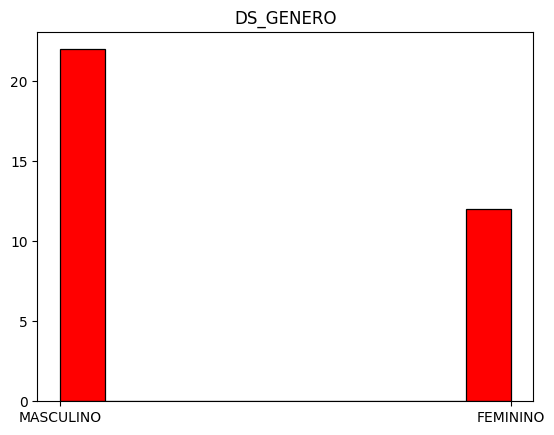

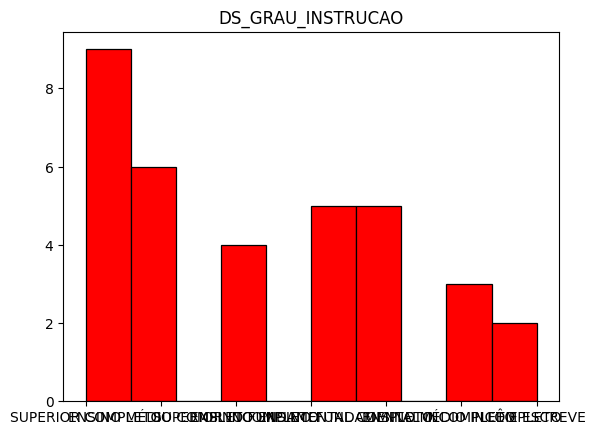

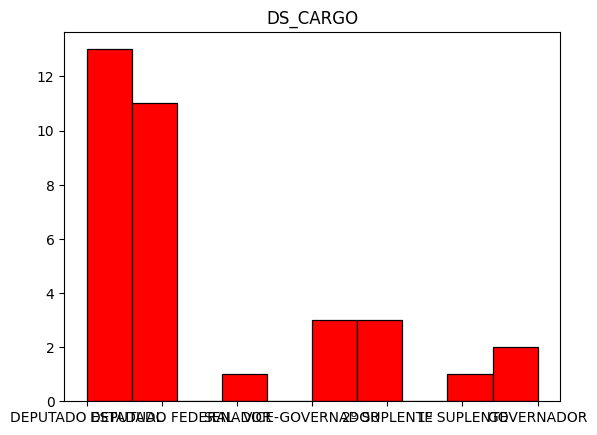

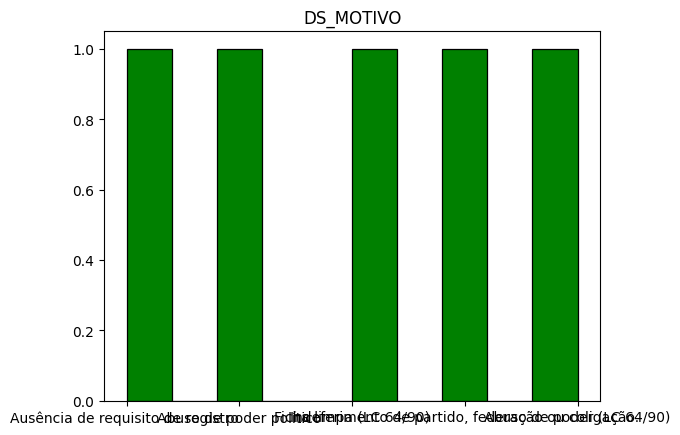

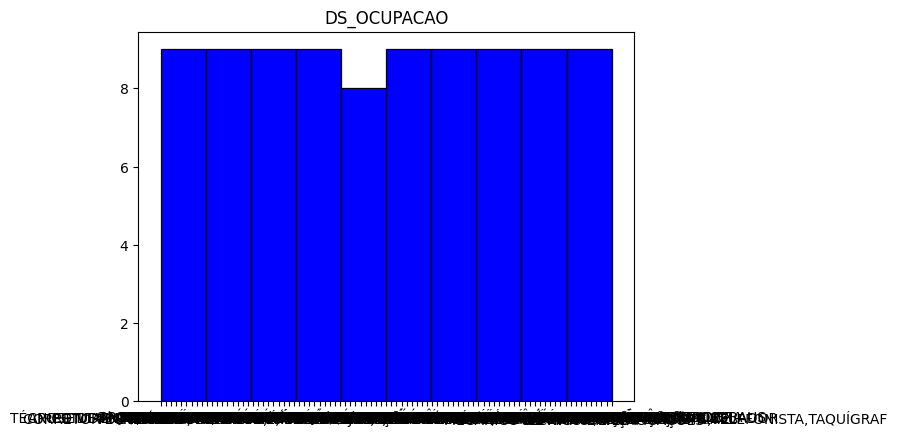

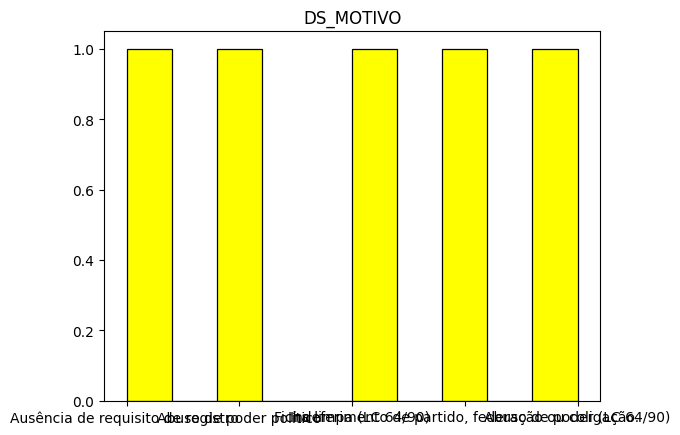

In [264]:
for atributo in cassacoes_por_perfil_normalizado.columns[:-1]:
    
    # cria o histograma
    n, bins, patches = plt.hist(cassacoes_por_perfil_normalizado[atributo].values,bins=10, color='red', edgecolor='black', linewidth=0.9)
    
    plt.title(atributo)
    plt.show()


for atributo in cassacoes_por_motivo_normalizado.columns[:-1]:
    
    # cria o histograma
    n, bins, patches = plt.hist(cassacoes_por_motivo_normalizado[atributo].values,bins=10, color='green', edgecolor='black', linewidth=0.9)
    
    plt.title(atributo)
    plt.show()


for atributo in cassacoes_por_ocupacao_normalizado.columns[:-1]:
    
    # cria o histograma
    n, bins, patches = plt.hist(cassacoes_por_ocupacao_normalizado[atributo].values,bins=10, color='blue', edgecolor='black', linewidth=0.9)
    
    plt.title(atributo)
    plt.show()


for atributo in cassacoes_por_motivo_normalizado.columns[:-1]:
    
    # cria o histograma
    n, bins, patches = plt.hist(cassacoes_por_motivo_normalizado[atributo].values,bins=10, color='yellow', edgecolor='black', linewidth=0.9)
    
    plt.title(atributo)
    plt.show()

Uma das maneiras mais simples de tratar *outliers* é remover aqueles valores que são menores que $Q1 - 1.5 * IQR$ ou maiores que $Q3 + 1.5 * IQR$, onde $Q1$ é o primeiro quartil, $Q3$ é o terceiro quartil e $IQR$ é o intervalo interquartil. O IQR pode ser calculado pela seguinte equação: $IQR = Q3-Q1$. 

Como sabemos que esses grupos de dados são importantes e dispersos, não iremos remover os outliers.

Outra informação curiosa foi que achamos um candidato que aparece mais de uma vez como cassado.

In [276]:
display(df.columns)
print(df['NM_CANDIDATO'].value_counts())

candidato_count = df['NM_CANDIDATO'].value_counts()
candidatos_2_vezes = candidato_count[candidato_count == 2].index

df_filtrado = df[df['NM_CANDIDATO'].isin(candidatos_2_vezes)]

# Exibir 'NM_CANDIDATO' e 'DS_MOTIVO' das linhas filtradas
print(df_filtrado[['NM_CANDIDATO', 'DS_MOTIVO']])

# mostra o gráfico
plt.show()

Index(['SQ_CANDIDATO', 'NM_CANDIDATO', 'SG_PARTIDO', 'DS_CARGO',
       'DS_GRAU_INSTRUCAO', 'SG_UF', 'DS_GENERO', 'DS_COR_RACA', 'DS_OCUPACAO',
       'DS_SIT_TOT_TURNO', 'DS_TP_MOTIVO', 'DS_MOTIVO'],
      dtype='object')

NM_CANDIDATO
MARCOS VINICIUS SOUZA DA SILVA        2
MARCOS RODRIGUES                      1
CLAUDIO AUGUSTO PEREIRA               1
WALTER DE BARROS                      1
UBIRADILSON DA SILVA                  1
                                     ..
WILSON JOSÉ WITZEL                    1
JOÃO AQUILES NETTO DE PAIVA JUNIOR    1
MARCIO ANTONIO DA SILVA               1
SERGIO DA COSTA ARAUJO                1
ISMAEL CARLOS NASCIMENTO DE JESUS     1
Name: count, Length: 623, dtype: int64
                       NM_CANDIDATO                           DS_MOTIVO
158  MARCOS VINICIUS SOUZA DA SILVA  Ausência de requisito de registro 
168  MARCOS VINICIUS SOUZA DA SILVA  Ausência de requisito de registro 


## Correlação entre os atributos

Quando dois atributos possuem valores idênticos ou muito semelhantes para todas as amostras, um deles deve ser eliminado ou eles devem ser combinados. Isso ajuda a diminuir o custo computacional das tarefas de aprendizado e evita que o aprendizado de alguns método seja prejudicado, principalmente os métodos baseados em otimização.

Uma das maneiras mais comuns de analisar a correlação dos dados é através das matrizes de correlação e covariância. Podemos fazer isso usando as funções nativas de correlação e covariância da bilioteca `Pandas`.

Nesse caso, vamos calcular a correlação de grau de instrução com o número de cassações. Para isso, precisamos transformar a coluna categórica DS_GRAU_INSTRUCAO em numerica. Também comparar e aplicar o algoritmo para entender a correlação, que será mostrado abaixo.

In [291]:

# display(cassacoes_por_perfil_normalizado)
# Supondo que o DataFrame df já tenha a coluna 'DS_GRAU_INSTRUCAO' e 'TOTAL_PERFIL'

# Transformando 'DS_GRAU_INSTRUCAO' em variáveis dummies
df_dummies = pd.get_dummies(cassacoes_por_perfil_normalizado['DS_GRAU_INSTRUCAO'], drop_first=True)  # Remover a primeira coluna para evitar multicolinearidade

# Adicionando as variáveis dummies ao DataFrame original
df_combined = pd.concat([cassacoes_por_perfil_normalizado['TOTAL_PERFIL'], df_dummies], axis=1)

# Exibindo as primeiras linhas para verificar se as variáveis dummies foram corretamente adicionadas
# print(df_combined.head())

# Calculando a correlação entre 'TOTAL_PERFIL' e as variáveis dummies de grau de instrução
correlation = df_combined.corr()

# Exibindo a correlação entre 'TOTAL_PERFIL' e as variáveis dummies de grau de instrução
print(correlation['TOTAL_PERFIL'])



TOTAL_PERFIL                     1.000000
ENSINO FUNDAMENTAL INCOMPLETO   -0.184861
ENSINO MÉDIO COMPLETO            0.238803
ENSINO MÉDIO INCOMPLETO         -0.157183
LÊ E ESCREVE                    -0.142837
SUPERIOR COMPLETO                0.242248
SUPERIOR INCOMPLETO             -0.017805
Name: TOTAL_PERFIL, dtype: float64


* ENSINO FUNDAMENTAL INCOMPLETO (-0.184861)
    * A correlação negativa de -0.185 sugere uma relação fraca e negativa entre ENSINO FUNDAMENTAL INCOMPLETO e TOTAL_PERFIL. Isso indica que, à medida que o grau de instrução "ENSINO FUNDAMENTAL INCOMPLETO" aumenta, TOTAL_PERFIL tende a diminuir ligeiramente, mas essa correlação é fraca.
* ENSINO MÉDIO COMPLETO (0.238803)
    * A correlação de 0.239 indica uma relação fraca e positiva entre ENSINO MÉDIO COMPLETO e TOTAL_PERFIL. Isso sugere que, à medida que o grau de instrução "ENSINO MÉDIO COMPLETO" aumenta, TOTAL_PERFIL tende a aumentar um pouco, embora a relação seja fraca.
* ENSINO MÉDIO INCOMPLETO (-0.157183)
    * A correlação de -0.157 é negativa e fraca. Isso sugere que ENSINO MÉDIO INCOMPLETO tem uma leve tendência de diminuir o TOTAL_PERFIL, mas a relação é fraca e insignificante.
* LÊ E ESCREVE (-0.142837)
    * A correlação de -0.143 é também negativa e fraca, indicando uma leve tendência de diminuição em TOTAL_PERFIL à medida que a categoria "LÊ E ESCREVE" aumenta.
* SUPERIOR COMPLETO (0.242248)
    * A correlação de 0.242 é uma correlação positiva fraca, indicando que SUPERIOR COMPLETO tem uma leve tendência de aumentar o TOTAL_PERFIL. Embora a correlação seja positiva, ela é moderada.
* SUPERIOR INCOMPLETO (-0.017805)
    * A correlação muito baixa e negativa de -0.018 sugere que não há praticamente nenhuma relação entre SUPERIOR INCOMPLETO e TOTAL_PERFIL. A correlação é quase nula, indicando uma ausência de influência.


A correlação positiva com ENSINO MÉDIO COMPLETO e SUPERIOR COMPLETO sugere que, na amostra que analisamos, esses graus de instrução estão ligeiramente associados a um maior TOTAL_PERFIL, mas essa correlação é relativamente fraca.
As correlações negativas fracas com ENSINO FUNDAMENTAL INCOMPLETO e ENSINO MÉDIO INCOMPLETO sugerem uma leve tendência de redução no TOTAL_PERFIL com esses graus de instrução, mas, novamente, as correlações são fracas.
SUPERIOR INCOMPLETO não tem praticamente nenhuma correlação com TOTAL_PERFIL, já que a correlação é extremamente próxima de zero.

In [292]:

# display(cassacoes_por_perfil_normalizado)
# Supondo que o DataFrame df já tenha a coluna 'DS_GRAU_INSTRUCAO' e 'TOTAL_PERFIL'

# Transformando 'DS_GRAU_INSTRUCAO' em variáveis dummies
df_dummies = pd.get_dummies(cassacoes_por_ocupacao_normalizado['DS_OCUPACAO'], drop_first=True)  # Remover a primeira coluna para evitar multicolinearidade

# Adicionando as variáveis dummies ao DataFrame original
df_combined = pd.concat([cassacoes_por_ocupacao_normalizado['TOTAL_OCUPACAO'], df_dummies], axis=1)

# Exibindo as primeiras linhas para verificar se as variáveis dummies foram corretamente adicionadas
# print(df_combined.head())

# Calculando a correlação entre 'TOTAL_PERFIL' e as variáveis dummies de grau de instrução
correlation = df_combined.corr()

# Exibindo a correlação entre 'TOTAL_PERFIL' e as variáveis dummies de grau de instrução
print(correlation['TOTAL_OCUPACAO'])


TOTAL_OCUPACAO                                 1.000000
ADVOGADO                                       0.174428
AGENTE ADMINISTRATIVO                         -0.005514
AGENTE DE SAÚDE E SANITARISTA                 -0.027325
AGRICULTOR                                    -0.032778
                                                 ...   
TÉCNICO DE MECÂNICA                           -0.032778
TÉCNICO EM EDIFICAÇÕES                        -0.032778
VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA   -0.016420
VEREADOR                                      -0.016420
VIGILANTE                                     -0.021872
Name: TOTAL_OCUPACAO, Length: 89, dtype: float64


Ocupações com correlação positiva:
* Apenas ADVOGADO apresenta uma correlação positiva fraca, mas ainda assim não é uma correlação forte.

Ocupações com correlação negativa e quase nula:
* Muitas das ocupações têm correlação negativa muito fraca, como AGENTE ADMINISTRATIVO, AGENTE DE SAÚDE E SANITARISTA, AGRICULTOR, VENDEDOR, VEREADOR e VIGILANTE, o que indica uma ausência de relação significativa entre essas ocupações e TOTAL_OCUPACAO.

Implicação para análise:
* Os dados não mostram uma correlação clara e forte entre a ocupação e a quantidade de cassações/perfil de ocupação (TOTAL_OCUPACAO), com exceção da ocupação de ADVOGADO, que tem uma correlação positiva leve.
* A maioria das ocupações não está associada significativamente à variável TOTAL_OCUPACAO com base nos dados fornecidos.